## Ejercicio 3: Reportes BI (7pts)
**Descripción:** Con la estructura DWH construida en el ejercicio 2, se debe generar los mismos reportes solicitados por el área de negocio.
- Top 10 Productos más vendidos (1p)
- Top 5 Clientes con el mayor número de pedidos (1p)
- Top 5 Corresponsales con el mayor número de pedidos (1p)
- Total de pagos diario y mensual por productos (1p)
- Total de pagos diario y mensual por clientes (1p)
- Total de pagos diario y mensual por corresponsal (1p)
- Variación diaria, mensual de pedidos por productos y corresponsal (1p)

**Entregables:**
- Notebook Jupyter con las consultas, agregaciones y filtros necesarios para presentar el reporte solicitado. 

In [46]:
pip install sqlalchemy psycopg2-binary pandas

Note: you may need to restart the kernel to use updated packages.


In [47]:
!pip install matplotlib seaborn

     |████████████████████████████████| 8.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 19.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 20.5 MB/s eta 0:00:01


In [143]:
#Importacion de librerias
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
sns.set(style="whitegrid") 

In [50]:
#Conexión a la base de datos de postgres
usuario = 'postgres'       
contrasena = 'postgres'  
host = 'localhost'         
puerto = '5432'           
bd = 'postgres'   

conexion_dw = f'postgresql+psycopg2://{usuario}:{contrasena}@{host}:{puerto}/{bd}'

engine_dw = create_engine(conexion_dw)

In [51]:

#Carga de datos
df_thordenes = pd.read_sql('SELECT * FROM th_ordenes', engine_dw)
df_dimfecha = pd.read_sql('SELECT * FROM dim_fecha', engine_dw)
df_dimcorresponsales = pd.read_sql('SELECT * FROM dim_corresponsales', engine_dw)
df_dimproductos = pd.read_sql('SELECT * FROM dim_productos', engine_dw)
df_dimclientes = pd.read_sql('SELECT * FROM dim_clientes', engine_dw)


## Top 10 Productos más vendidos (1p)

In [67]:
top_productos = (df_thordenes.merge(df_dimproductos, on='id_producto').groupby('nombre')['cantidad'].sum().sort_values(ascending=False).head(10).reset_index())
top_productos


nombre  cantidad
0         PLACA BASE ASUS N ROG STRIX        29
1  LAPTOP LENOVO THINKPAD X1 N CARBON        26
2     MEMORIA RAM CORSAIR N 32GB DDR5        26
3       CONTROL XBOX N ELITE SERIES 2        23
4     SMARTPHONE SAMSUNG GALAXY N S24        23
5    TECLADO MECANICO N LOGITECH G915        22
6             TABLET APPLE IPAD N PRO        20
7             CONSOLA XBOX N SERIES X        20
8    DISCO DURO EXTERNO N SEAGATE 2TB        18
9      PROCESADOR AMD N RYZEN 9 7950X        18

/tmp/ipykernel_22138/329637798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_productos, x='cantidad', y='nombre', palette='viridis')


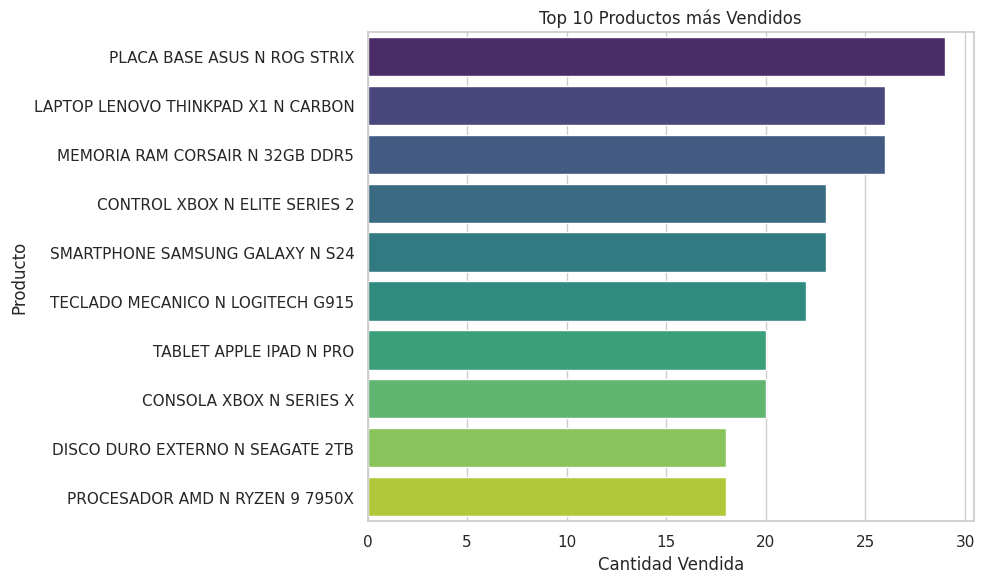

In [75]:
#Gráfica de los 10 productos más vendidos
plt.figure(figsize=(10,6))
sns.barplot(data=top_productos, x='cantidad', y='nombre', palette='viridis')
plt.title('Top 10 Productos más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

## Top 5 Clientes con el mayor número de pedidos (1p)

In [53]:
top_clientes = (df_thordenes.merge(df_dimclientes, on='id_cliente').groupby('nombre')['id_orden'].nunique()
                .sort_values(ascending=False).head(5).reset_index().rename(columns={'id_orden': 'total_pedidos'}))
top_clientes


nombre  total_pedidos
0      ADELIA NOGUES FERRANDO              3
1       ALEJANDRA JUAN ROBLES              3
2  HERMINIA COROMINAS BARCELO              3
3     ITZIAR SEVILLANO MOLINS              3
4     ELIGIA CARRERA FABREGAS              3

/tmp/ipykernel_22138/3225322816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_clientes, x='total_pedidos', y='nombre', palette='magma')


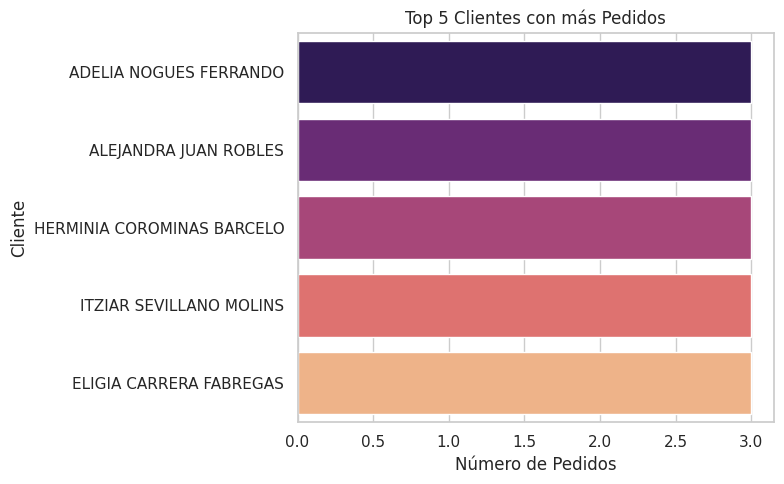

In [71]:
#Gráfica de los 5 clientes con el mayor número de pedidos
plt.figure(figsize=(8,5))
sns.barplot(data=top_clientes, x='total_pedidos', y='nombre', palette='magma')
plt.title('Top 5 Clientes con más Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Cliente')
plt.tight_layout()
plt.show()

## Top 5 Corresponsales con el mayor número de pedidos (1p)

In [54]:
top_corresponsales = (df_thordenes.merge(df_dimcorresponsales, on='id_corresponsal').groupby('nombre')['id_orden'].nunique()
    .sort_values(ascending=False).head(5).reset_index().rename(columns={'id_orden': 'total_pedidos'}))
top_corresponsales


nombre  total_pedidos
0  Cooperativa Andalucía             16
1              RedActiva             14
2          Western Union             14
3     Banco del Pacífico             11
4        Banco Pichincha              8

/tmp/ipykernel_22138/2957981837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corresponsales, x='total_pedidos', y='nombre', palette='cubehelix')


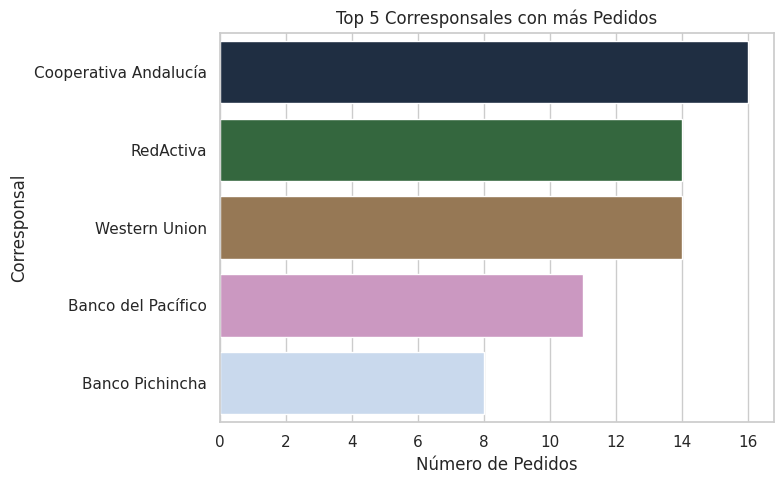

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_corresponsales, x='total_pedidos', y='nombre', palette='cubehelix')
plt.title('Top 5 Corresponsales con más Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Corresponsal')
plt.tight_layout()
plt.show()

## Total de pagos diario y mensual por productos (1p)

In [55]:
df = df_thordenes.merge(df_dimfecha, on='id_fecha').merge(df_dimproductos, on='id_producto')

# Diario
pagos_diario_producto = (df.groupby(['anio', 'mes', 'dia', 'nombre'])['subtotal']
    .sum().reset_index().rename(columns={'nombre': 'producto', 'subtotal': 'total_pagado'}))

# Mensual
pagos_mensual_producto = (df.groupby(['anio', 'mes', 'nombre'])['subtotal'].sum().reset_index()
    .rename(columns={'nombre': 'producto', 'subtotal': 'total_pagado'}))


In [203]:
pagos_diario_producto

anio  mes  dia                                producto  total_pagado
0    2025    1    1                 CONSOLA XBOX N SERIES X        767.28
1    2025    1    1           SERVIDOR DELL N POWEREDGE T40       1445.04
2    2025    1    2                 CONSOLA PLAYSTATION N 5        469.34
3    2025    1    2               MONITOR LG ULTRAWIDE N 34       1164.62
4    2025    1    3          PROCESADOR AMD N RYZEN 9 7950X        184.53
..    ...  ...  ...                                     ...           ...
140  2025    4   25  AURICULARES SONY WH 1000XM5 N WIRELESS        993.18
141  2025    4   25                 CONSOLA XBOX N SERIES X        383.64
142  2025    4   25             IMPRESORA HP N LASERJET PRO        230.00
143  2025    4   25              LECTOR KINDLE N PAPERWHITE        380.97
144  2025    4   25        SISTEMA MESH WIFI N NETGEAR ORBI       1558.28

[145 rows x 5 columns]

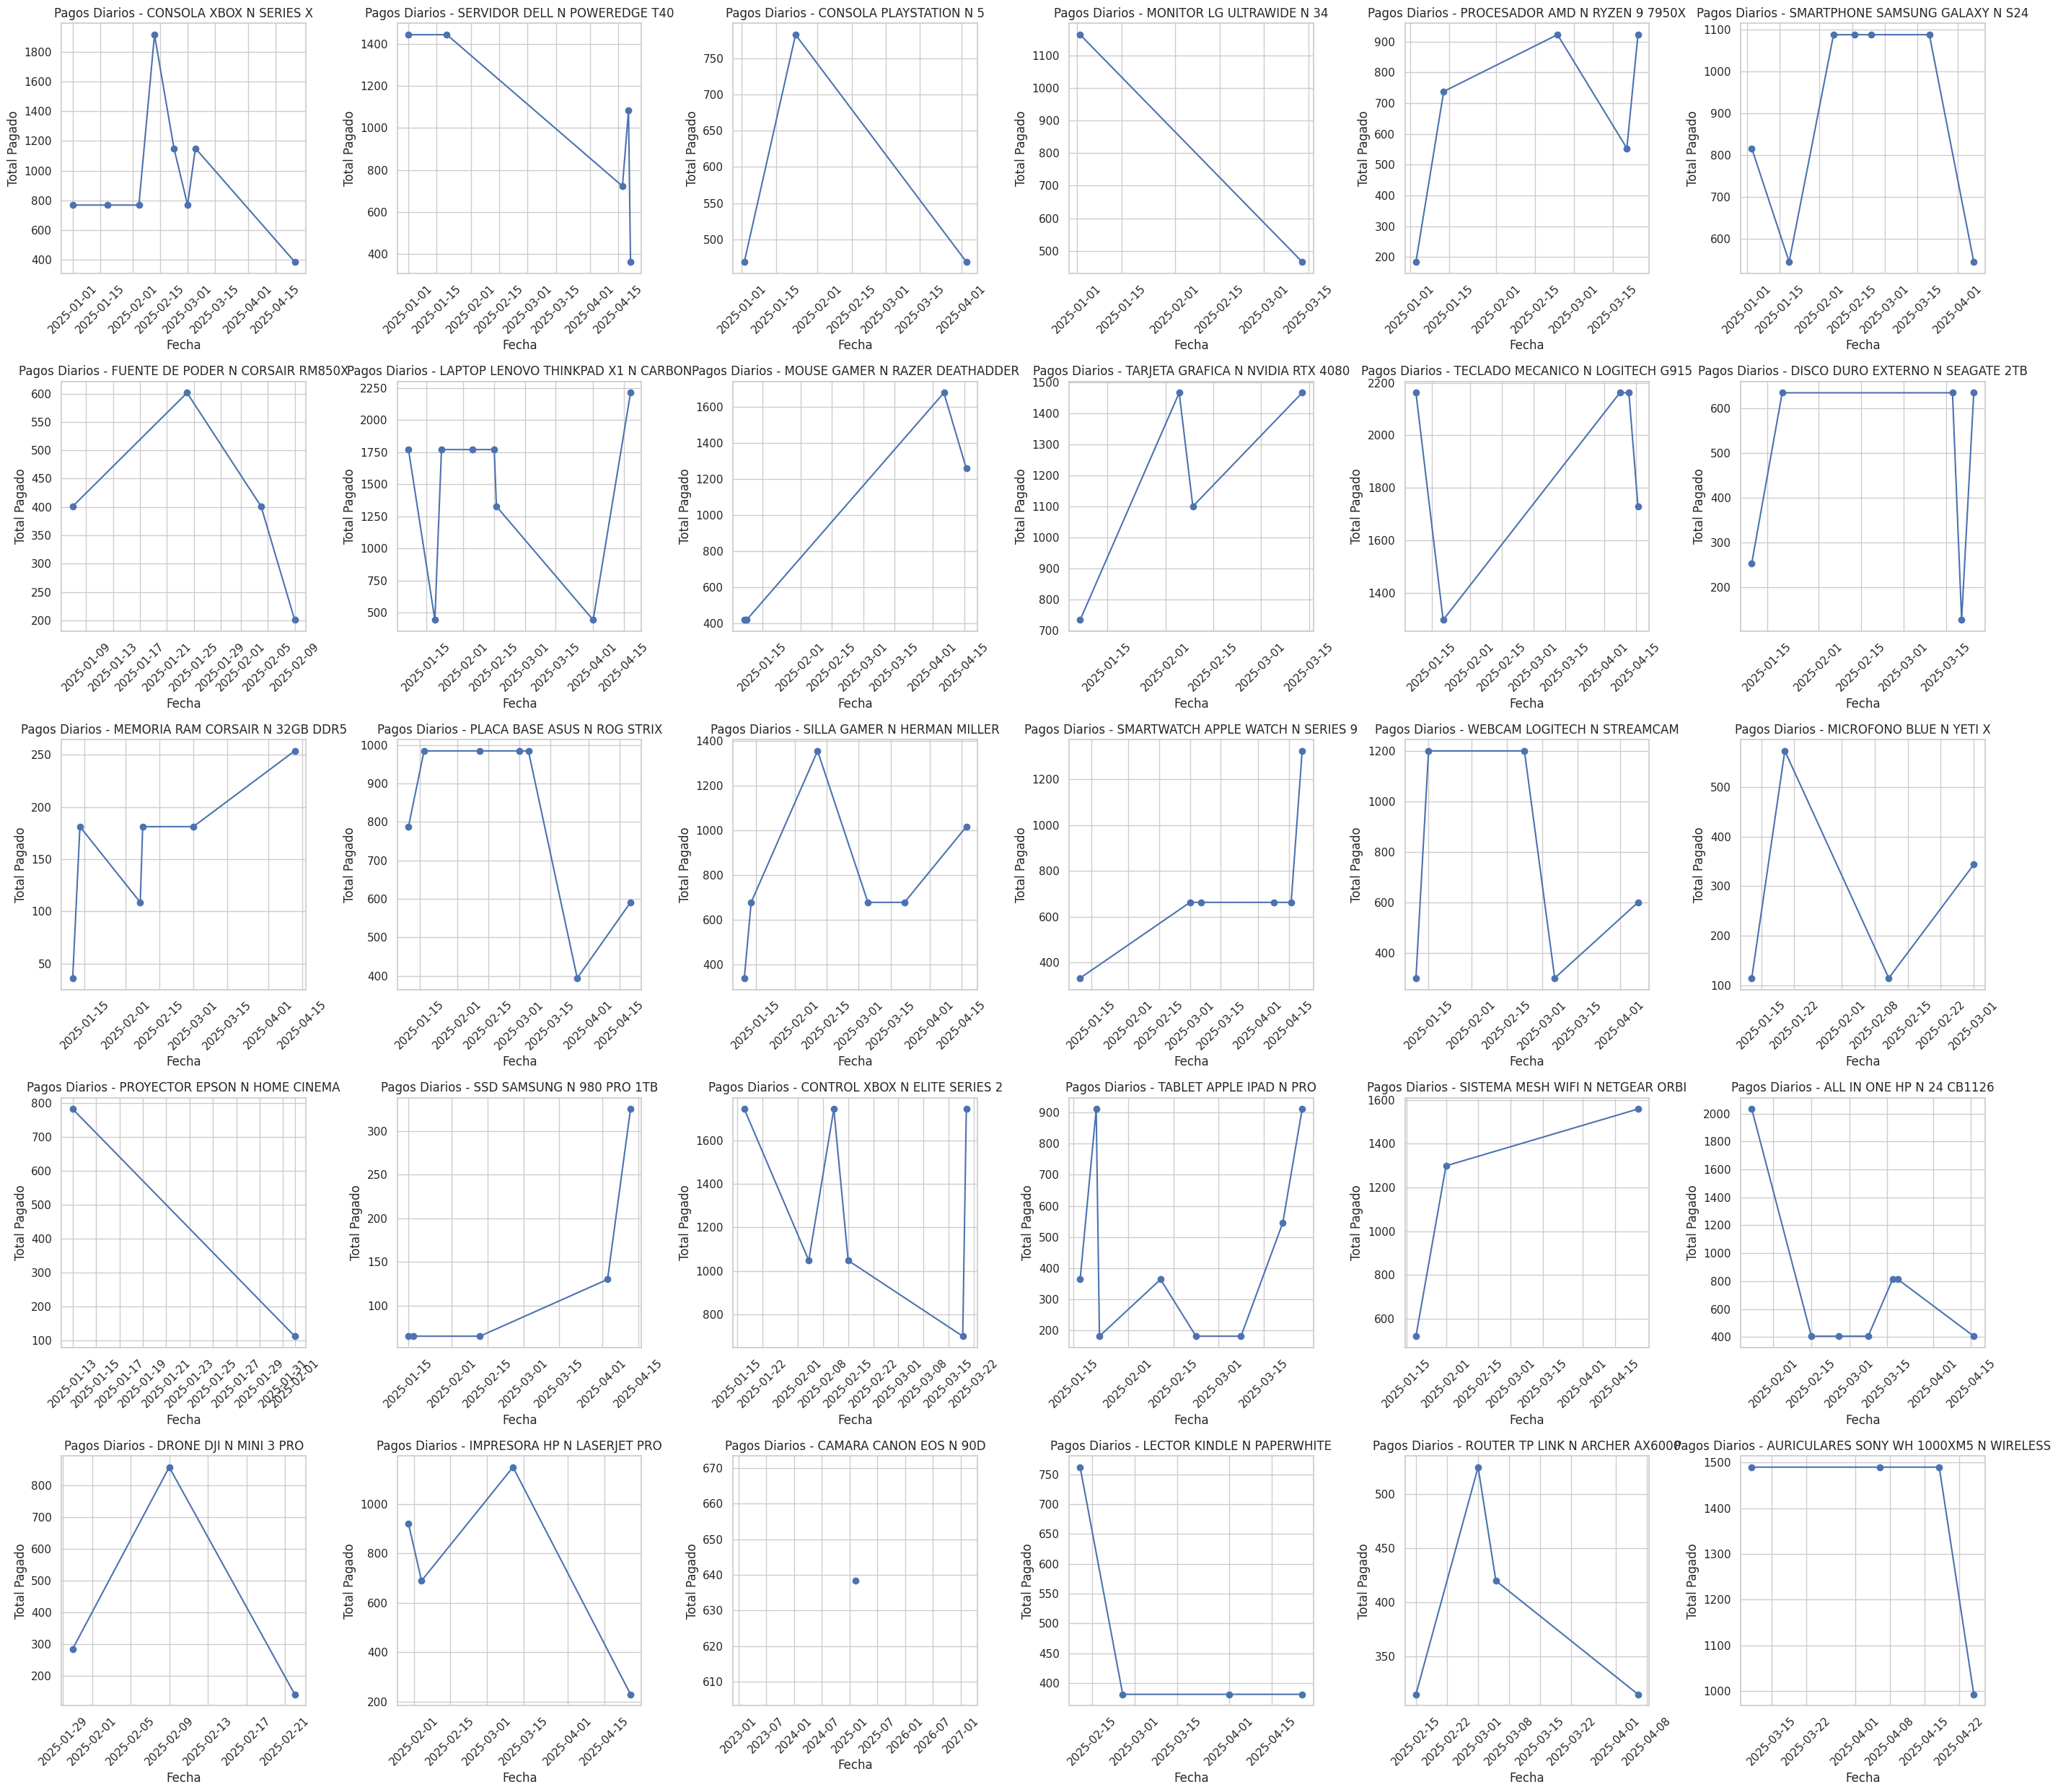

In [123]:
# Crear columna de fecha
df_diario = pagos_diario_producto.copy()
df_diario = df_diario.rename(columns={'anio': 'year', 'mes': 'month', 'dia': 'day'})
df_diario['fecha'] = pd.to_datetime(df_diario[['year', 'month', 'day']])

# Obtener lista de productos
productos = df_diario['producto'].unique()

# Definir el número de columnas
num_columnas = 6
num_filas = (len(productos) // num_columnas) + (len(productos) % num_columnas != 0)

# Crear las subgráficas
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(28, 5 * num_filas))

# Aplanar el arreglo de ejes para facilitar el manejo
axes = axes.flatten()

# Crear una gráfica para cada producto
for i, producto in enumerate(productos):
    df_producto = df_diario[df_diario['producto'] == producto]
    
    axes[i].plot(df_producto['fecha'], df_producto['total_pagado'], marker='o')
    axes[i].set_title(f'Pagos Diarios - {producto}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Total Pagado')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar los subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()



In [202]:
pagos_mensual_producto

anio  mes                           producto  total_pagado
0   2025    1          ALL IN ONE HP N 24 CB1126       2032.12
1   2025    1            CONSOLA PLAYSTATION N 5       1251.57
2   2025    1            CONSOLA XBOX N SERIES X       1534.56
3   2025    1      CONTROL XBOX N ELITE SERIES 2       1746.42
4   2025    1   DISCO DURO EXTERNO N SEAGATE 2TB        888.15
..   ...  ...                                ...           ...
80  2025    4    SMARTPHONE SAMSUNG GALAXY N S24        544.09
81  2025    4  SMARTWATCH APPLE WATCH N SERIES 9       2649.16
82  2025    4          SSD SAMSUNG N 980 PRO 1TB        455.28
83  2025    4   TECLADO MECANICO N LOGITECH G915       6052.62
84  2025    4        WEBCAM LOGITECH N STREAMCAM        599.77

[85 rows x 4 columns]

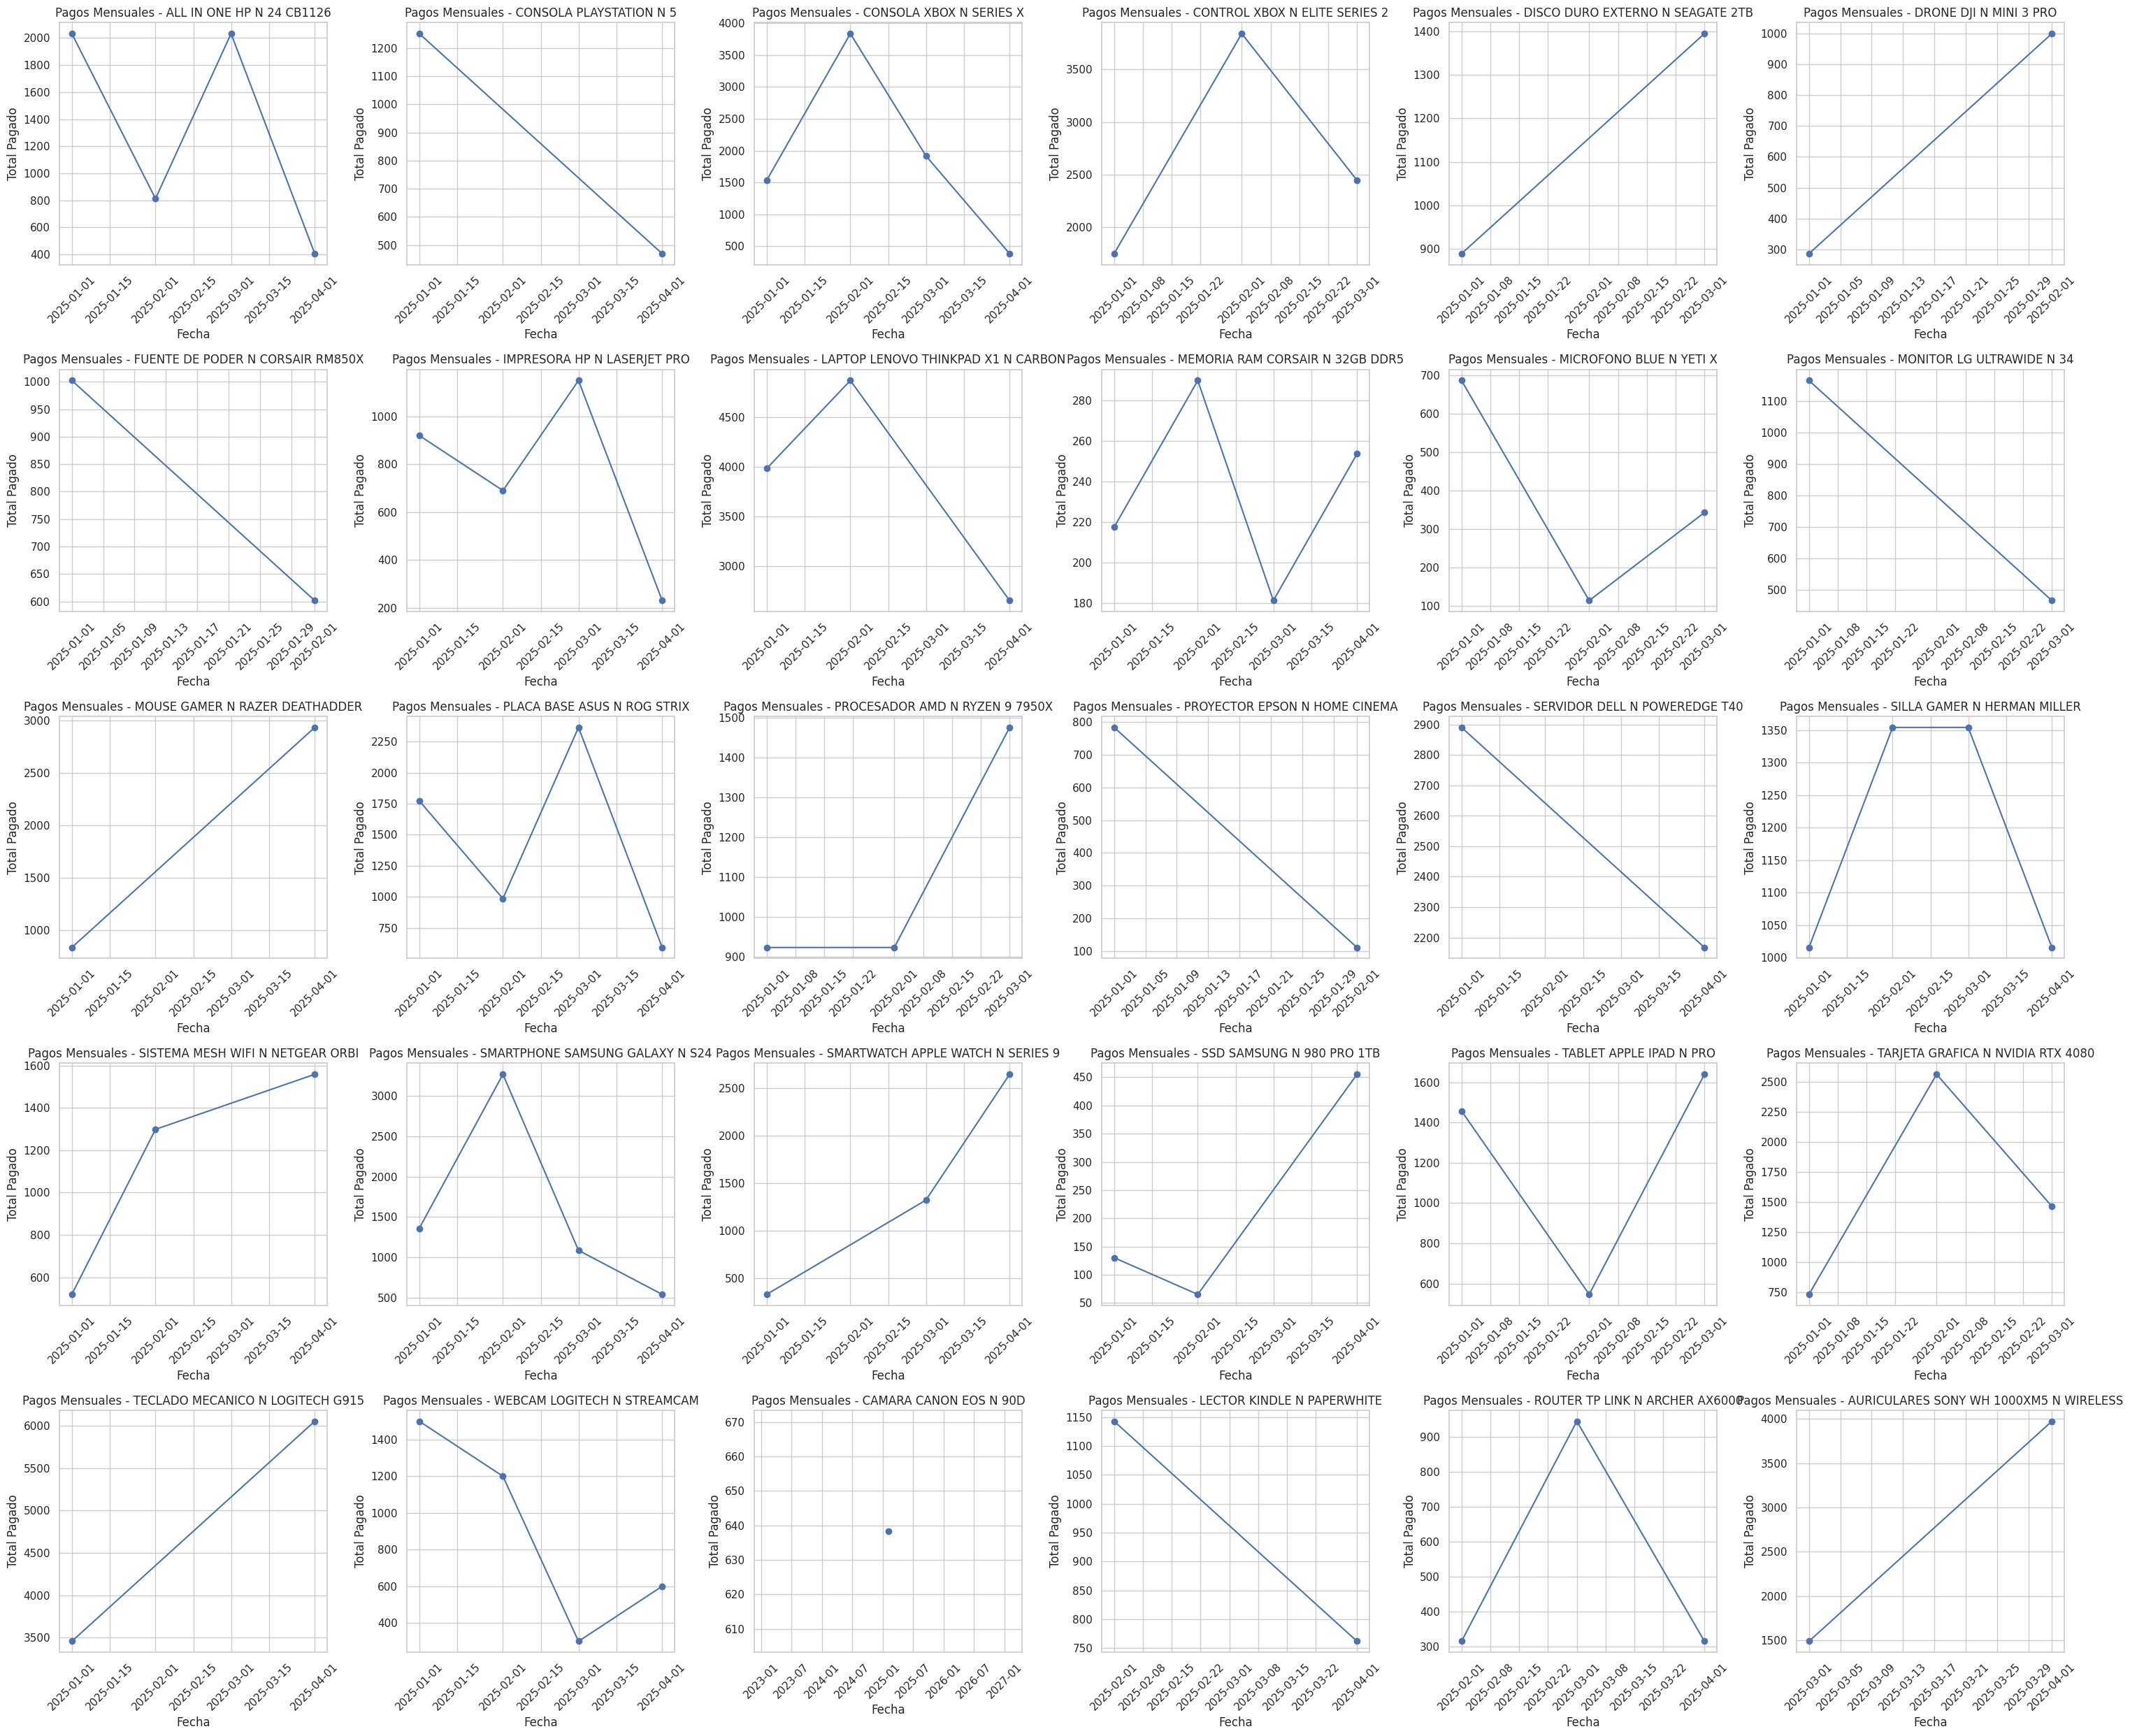

In [121]:
# Crear columna de fecha (basada en mes)
df_mensual = pagos_mensual_producto.copy()
df_mensual = df_mensual.rename(columns={'anio': 'year', 'mes': 'month'})
df_mensual['fecha'] = pd.to_datetime(df_mensual[['year', 'month']].assign(day=1))

# Obtener lista de productos
productos = df_mensual['producto'].unique()

# Definir el número de columnas
num_columnas = 6
num_filas = (len(productos) // num_columnas) + (len(productos) % num_columnas != 0)

# Crear las subgráficas
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(30, 5 * num_filas))

# Aplanar el arreglo de ejes para facilitar el manejo
axes = axes.flatten()

# Crear una gráfica para cada producto
for i, producto in enumerate(productos):
    df_producto = df_mensual[df_mensual['producto'] == producto]
    
    axes[i].plot(df_producto['fecha'], df_producto['total_pagado'], marker='o')
    axes[i].set_title(f'Pagos Mensuales - {producto}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Total Pagado')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar los subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()


## Total de pagos diario y mensual por clientes (1p)

In [58]:
df_clientes = df_thordenes.merge(df_dimfecha, on='id_fecha').merge(df_dimclientes, on='id_cliente')

# Diario
pagos_diario_cliente = (df_clientes.groupby(['anio', 'mes', 'dia', 'nombre'])['subtotal']
    .sum().reset_index().rename(columns={'nombre': 'cliente', 'subtotal': 'total_pagado'}))

# Mensual
pagos_mensual_cliente = (df_clientes.groupby(['anio', 'mes', 'nombre'])['subtotal']
    .sum().reset_index().rename(columns={'nombre': 'cliente', 'subtotal': 'total_pagado'}))


In [201]:
pagos_diario_cliente

anio  mes  dia                   cliente  total_pagado
0   2025    1    1     RUPERTO PLANA JIMENEZ       2212.32
1   2025    1    2       NIEVES CLAVERO PINO       1633.96
2   2025    1    3        SERGIO OTERO SERNA       1000.66
3   2025    1    7   ELIGIA CARRERA FABREGAS        820.13
4   2025    1    7   ITZIAR SEVILLANO MOLINS       2502.84
..   ...  ...  ...                       ...           ...
69  2025    4   20   ITZIAR SEVILLANO MOLINS       1674.84
70  2025    4   21  NICOLASA BELTRAN PAREDES       1685.84
71  2025    4   25          GUSTAVO MIRALLES       1268.85
72  2025    4   25    NELIDA ESCOBAR CORDOBA       1374.15
73  2025    4   25       ROSALINDA DEL VIGIL        903.07

[74 rows x 5 columns]

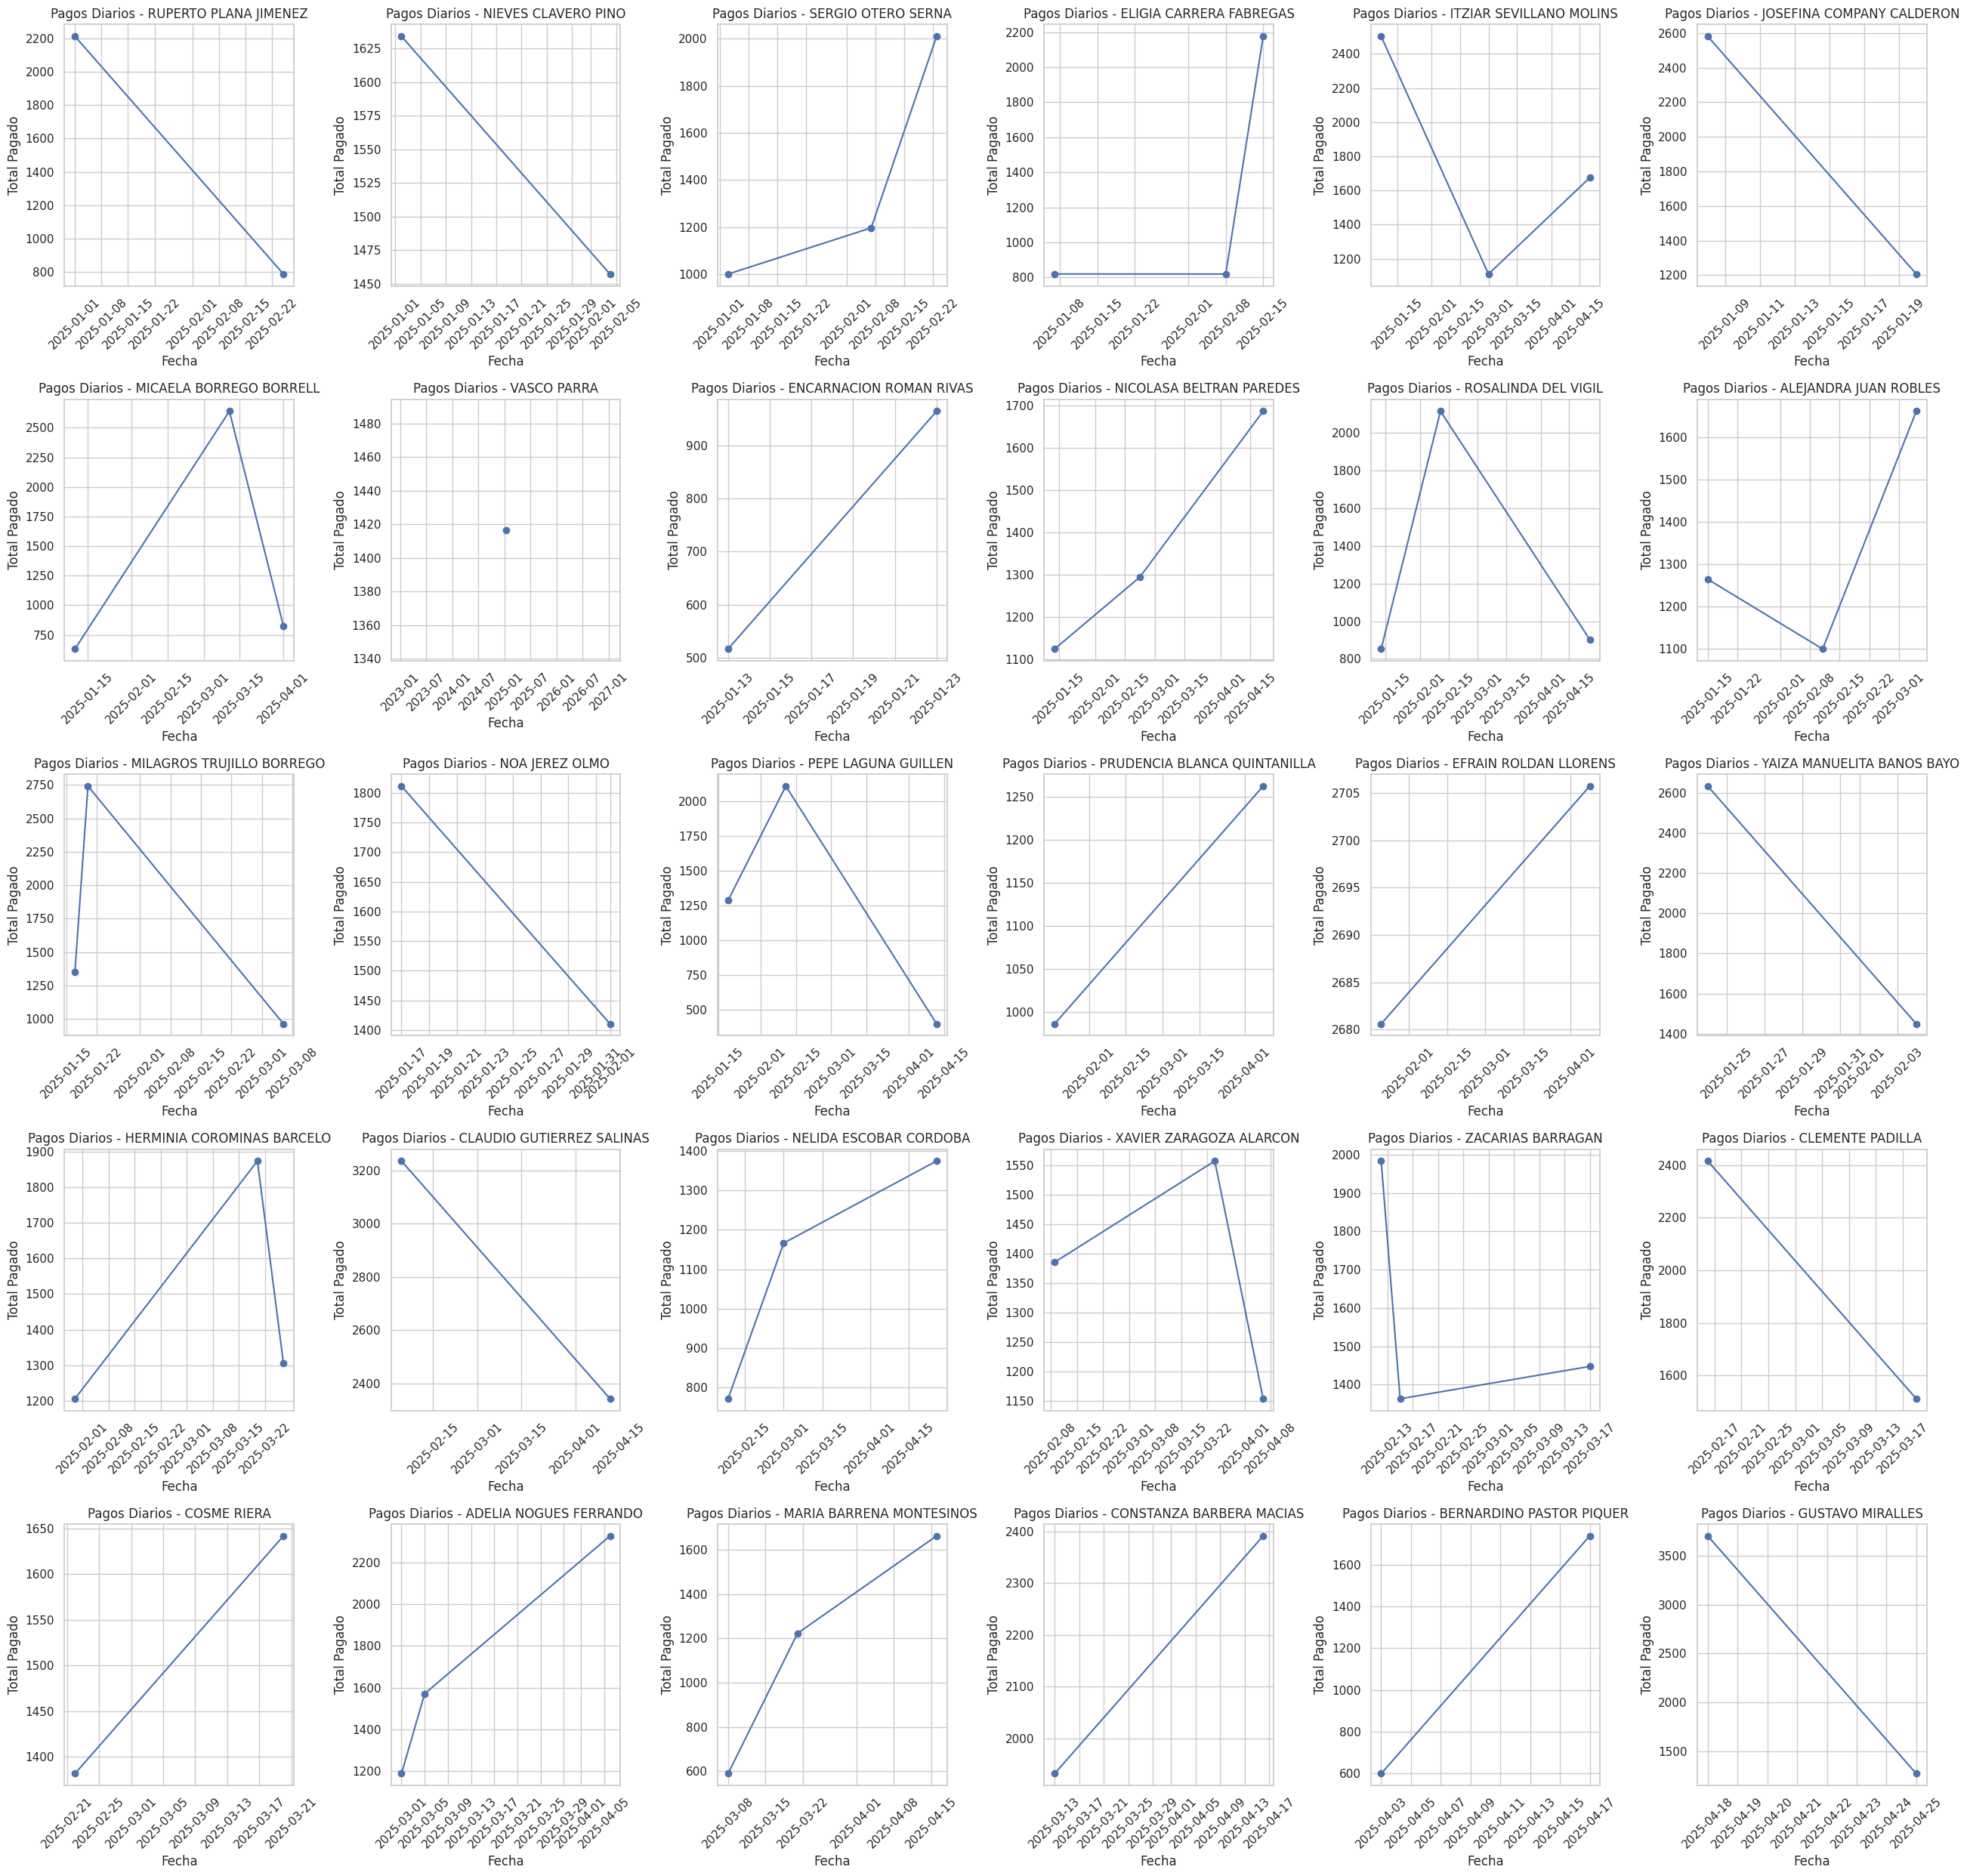

In [118]:
# Crear columna de fecha
df_diario_clientes = pagos_diario_cliente.copy()
df_diario_clientes = df_diario_clientes.rename(columns={'anio': 'year', 'mes': 'month', 'dia': 'day'})
df_diario_clientes['fecha'] = pd.to_datetime(df_diario_clientes[['year', 'month', 'day']])

# Obtener lista de clientes
clientes = df_diario_clientes['cliente'].unique()

# Definir subplots
num_columnas = 6
num_filas = (len(clientes) // num_columnas) + (len(clientes) % num_columnas != 0)

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(26, 5 * num_filas))
axes = axes.flatten()

# Crear gráfico por cliente
for i, cliente in enumerate(clientes):
    df_cliente = df_diario_clientes[df_diario_clientes['cliente'] == cliente]
    
    axes[i].plot(df_cliente['fecha'], df_cliente['total_pagado'], marker='o')
    axes[i].set_title(f'Pagos Diarios - {cliente}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Total Pagado')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [200]:
pagos_mensual_cliente

anio  mes                       cliente  total_pagado
0   2025    1         ALEJANDRA JUAN ROBLES       1264.57
1   2025    1         EFRAIN ROLDAN LLORENS       2680.62
2   2025    1       ELIGIA CARRERA FABREGAS        820.13
3   2025    1       ENCARNACION ROMAN RIVAS       1481.05
4   2025    1    HERMINIA COROMINAS BARCELO       1205.79
..   ...  ...                           ...           ...
58  2025    4      NICOLASA BELTRAN PAREDES       1685.84
59  2025    4           PEPE LAGUNA GUILLEN        397.68
60  2025    4  PRUDENCIA BLANCA QUINTANILLA       1262.06
61  2025    4           ROSALINDA DEL VIGIL        903.07
62  2025    4       XAVIER ZARAGOZA ALARCON       1153.32

[63 rows x 4 columns]

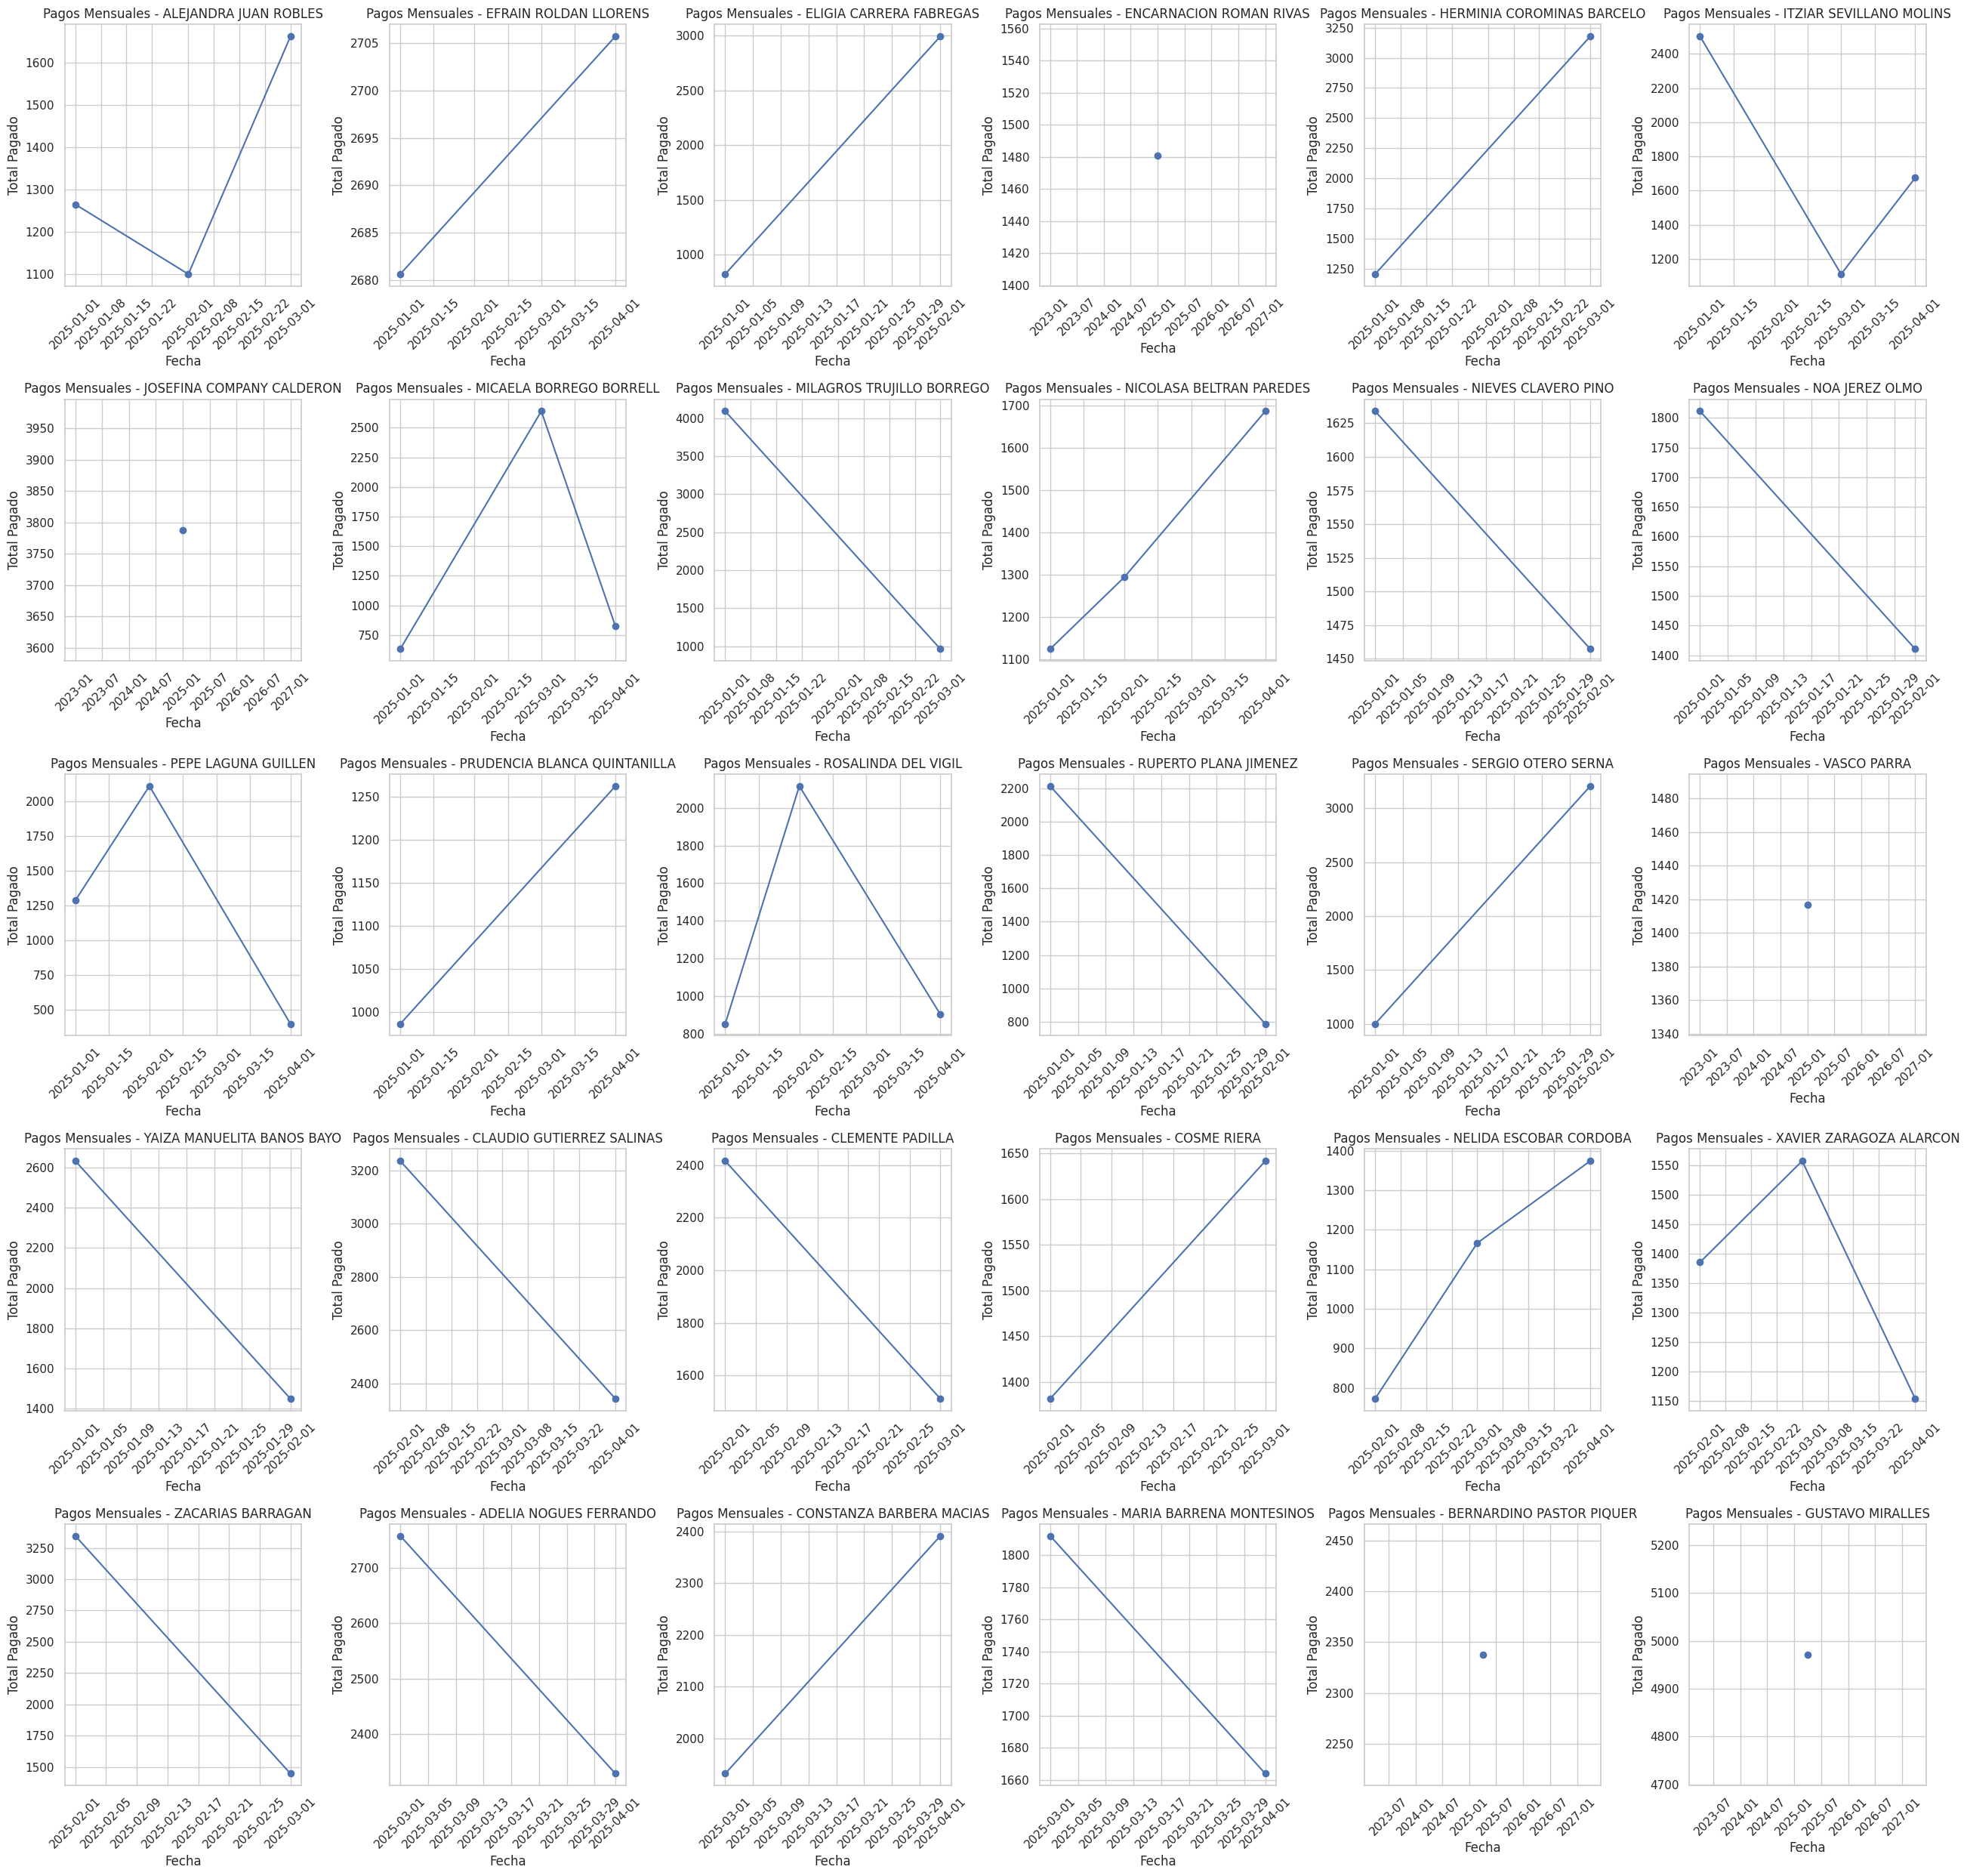

In [195]:
# Crear columna de fecha
df_mensual_clientes = pagos_mensual_cliente.copy()
df_mensual_clientes = df_mensual_clientes.rename(columns={'anio': 'year', 'mes': 'month'})
df_mensual_clientes['fecha'] = pd.to_datetime(df_mensual_clientes[['year', 'month']].assign(day=1))

# Obtener lista de clientes
clientes = df_mensual_clientes['cliente'].unique()

# Definir subplots
num_columnas = 6
num_filas = (len(clientes) // num_columnas) + (len(clientes) % num_columnas != 0)

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(26, 5 * num_filas))
axes = axes.flatten()

# Crear gráfico por cliente
for i, cliente in enumerate(clientes):
    df_cliente = df_mensual_clientes[df_mensual_clientes['cliente'] == cliente]
    
    axes[i].plot(df_cliente['fecha'], df_cliente['total_pagado'], marker='o')
    axes[i].set_title(f'Pagos Mensuales - {cliente}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Total Pagado')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Total de pagos diario y mensual por corresponsal (1p)

In [61]:
df_corresponsales = df_thordenes.merge(df_dimfecha, on='id_fecha').merge(df_dimcorresponsales, on='id_corresponsal')

# Diario
pagos_diario_corresponsal = (df_corresponsales.groupby(['anio', 'mes', 'dia', 'nombre'])['subtotal']
    .sum().reset_index().rename(columns={'nombre': 'corresponsal', 'subtotal': 'total_pagado'}))

# Mensual
pagos_mensual_corresponsal = (df_corresponsales.groupby(['anio', 'mes', 'nombre'])['subtotal']
    .sum().reset_index().rename(columns={'nombre': 'corresponsal', 'subtotal': 'total_pagado'}))


In [199]:
pagos_diario_corresponsal

anio  mes  dia           corresponsal  total_pagado
0   2025    1    1  Cooperativa Andalucía       2212.32
1   2025    1    2        Banco Guayaquil       1633.96
2   2025    1    3  Cooperativa Andalucía       1000.66
3   2025    1    7  Cooperativa Andalucía        820.13
4   2025    1    7          Western Union       2502.84
..   ...  ...  ...                    ...           ...
66  2025    4   20          Western Union       1674.84
67  2025    4   21        Banco Pichincha       1685.84
68  2025    4   25     Banco del Pacífico       1374.15
69  2025    4   25              RedActiva        903.07
70  2025    4   25          Western Union       1268.85

[71 rows x 5 columns]

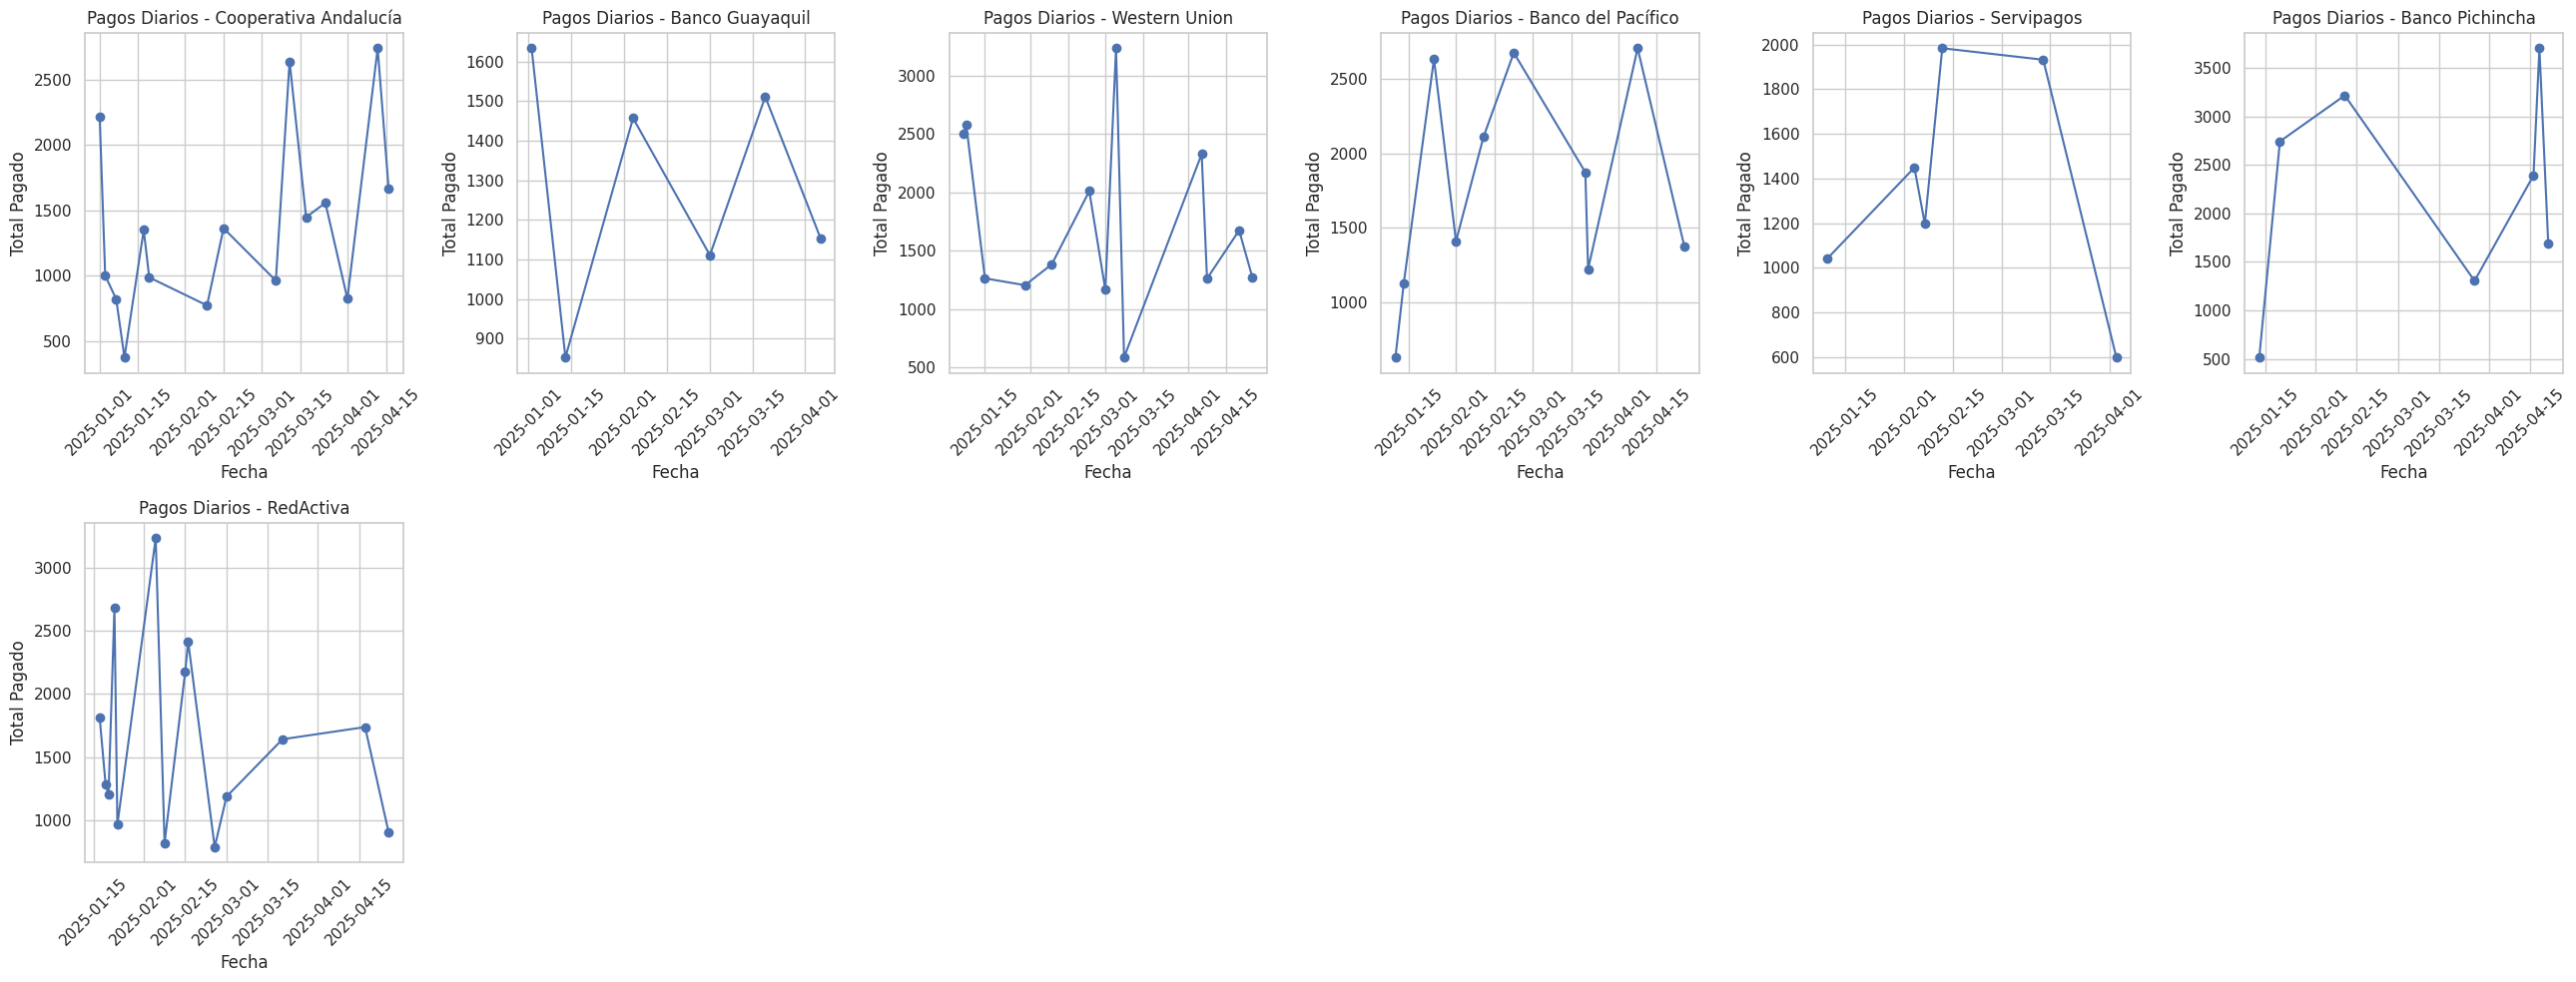

In [165]:
# Crear columna de fecha
df_diario_corr = pagos_diario_corresponsal.copy()
df_diario_corr = df_diario_corr.rename(columns={'anio': 'year', 'mes': 'month', 'dia': 'day'})
df_diario_corr['fecha'] = pd.to_datetime(df_diario_corr[['year', 'month', 'day']])

# Lista de corresponsales
corresponsales = df_diario_corr['corresponsal'].unique()

# Subplots
num_columnas = 6
num_filas = (len(corresponsales) // num_columnas) + (len(corresponsales) % num_columnas != 0)

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(26, 5 * num_filas))
axes = axes.flatten()

# Gráfico por corresponsal
for i, corresponsal in enumerate(corresponsales):
    df_corr = df_diario_corr[df_diario_corr['corresponsal'] == corresponsal]
    
    axes[i].plot(df_corr['fecha'], df_corr['total_pagado'], marker='o')
    axes[i].set_title(f'Pagos Diarios - {corresponsal}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Total Pagado')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [198]:
pagos_mensual_corresponsal

anio  mes           corresponsal  total_pagado
0   2025    1        Banco Guayaquil       2486.59
1   2025    1        Banco Pichincha       3258.71
2   2025    1     Banco del Pacífico       4389.00
3   2025    1  Cooperativa Andalucía       6743.83
4   2025    1              RedActiva       7950.13
5   2025    1             Servipagos       1041.84
6   2025    1          Western Union       7554.00
7   2025    2        Banco Guayaquil       1457.28
8   2025    2        Banco Pichincha       3215.65
9   2025    2     Banco del Pacífico       6196.58
10  2025    2  Cooperativa Andalucía       2134.94
11  2025    2              RedActiva       9434.63
12  2025    2             Servipagos       4628.97
13  2025    2          Western Union       3395.98
14  2025    3        Banco Guayaquil       2622.25
15  2025    3        Banco Pichincha       1304.74
16  2025    3     Banco del Pacífico       3096.77
17  2025    3  Cooperativa Andalucía       6606.21
18  2025    3              RedActiva       2829.08
19  2025    3             Servipagos       1931.69
20  2025    3          Western Union       4987.95
21  2025    4        Banco Guayaquil       1153.32
22  2025    4        Banco Pichincha       7779.62
23  2025    4     Banco del Pacífico       4079.89
24  2025    4  Cooperativa Andalucía       5227.84
25  2025    4              RedActiva       2641.16
26  2025    4             Servipagos        599.42
27  2025    4          Western Union       6533.82

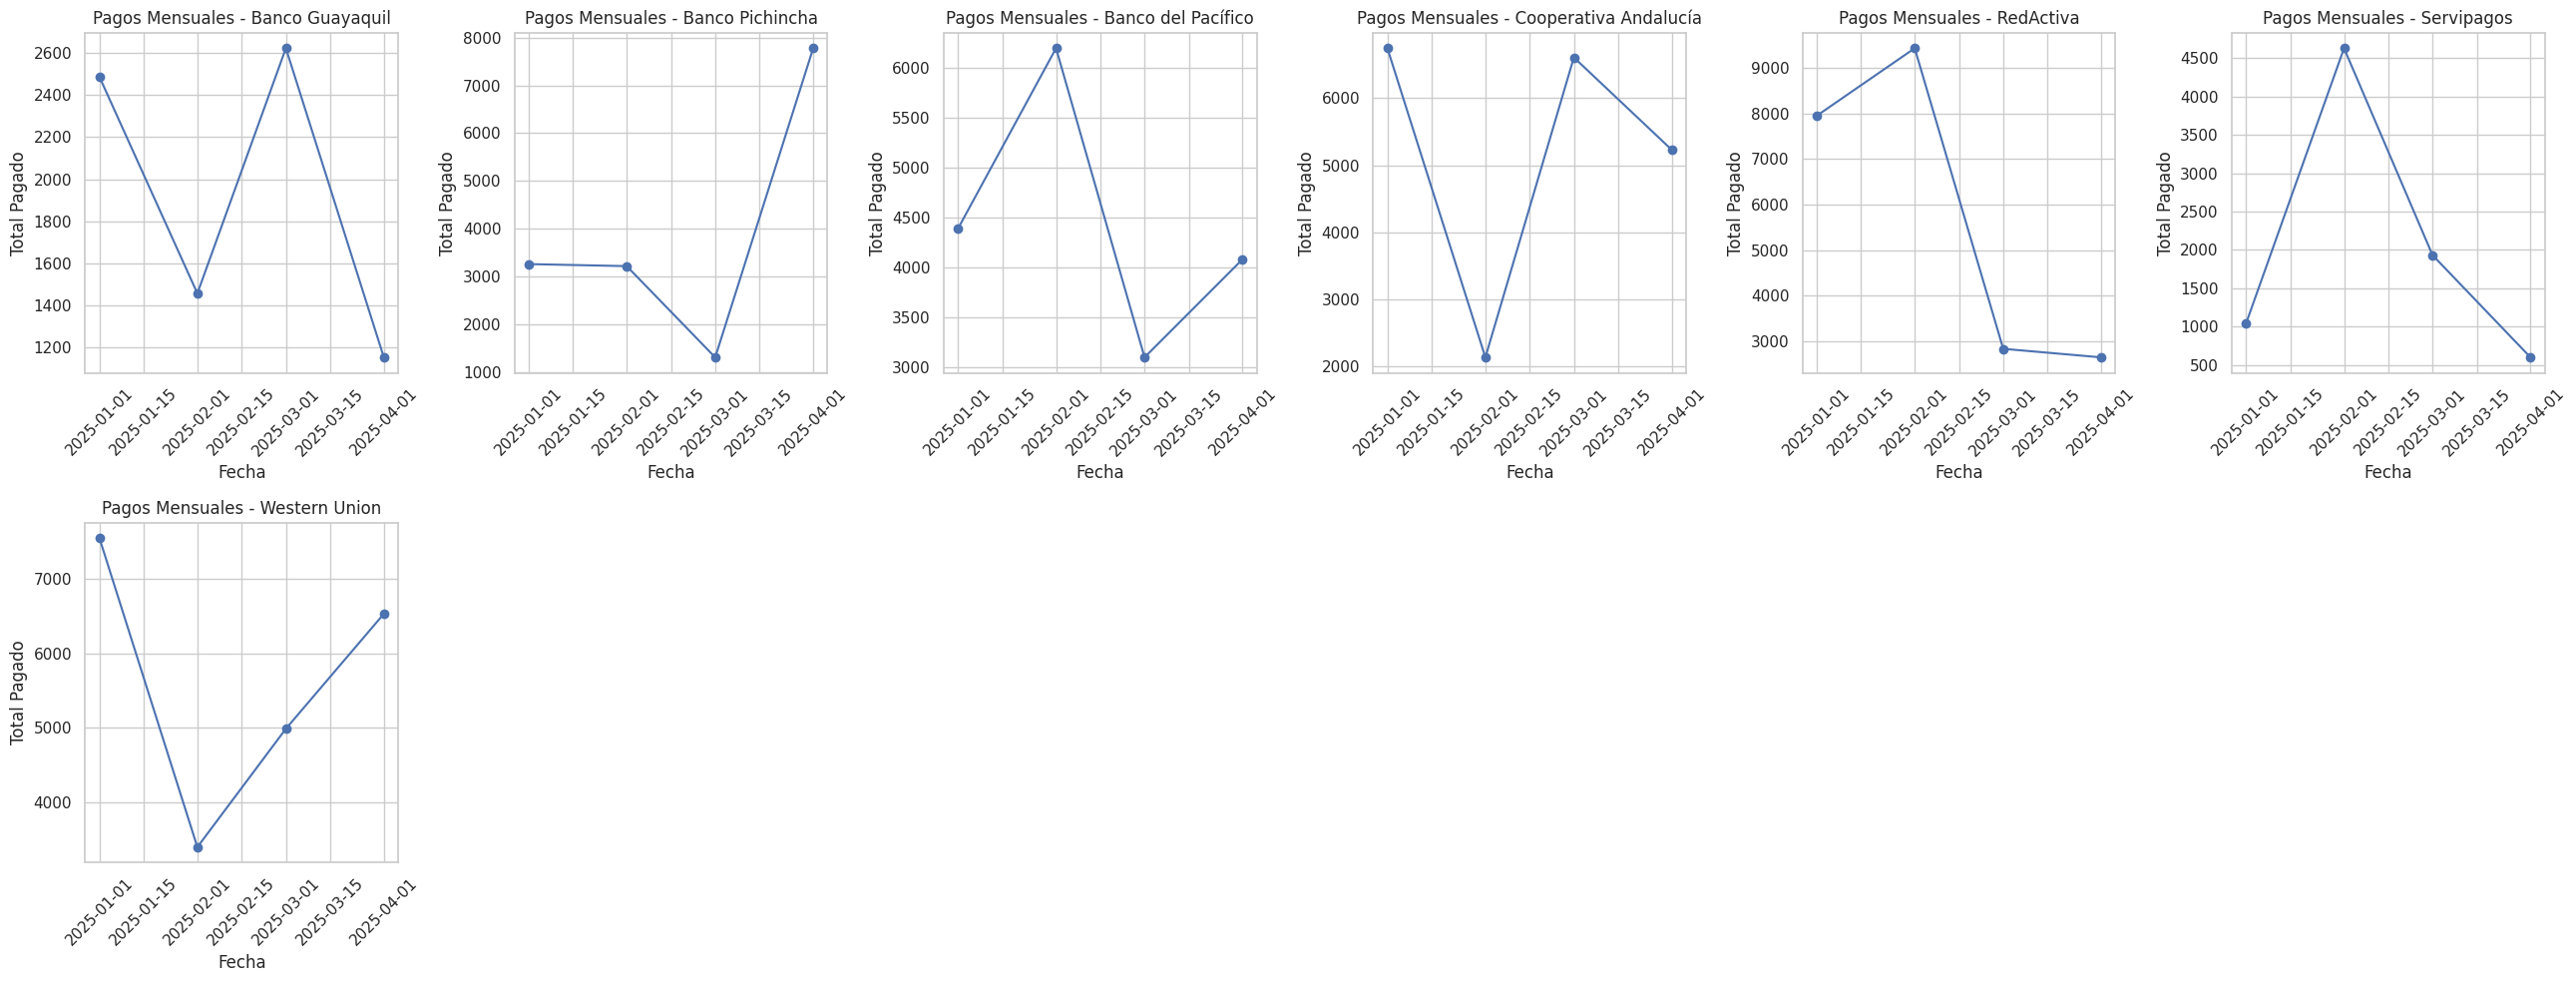

In [166]:
# Crear columna de fecha
df_mensual_corr = pagos_mensual_corresponsal.copy()
df_mensual_corr = df_mensual_corr.rename(columns={'anio': 'year', 'mes': 'month'})
df_mensual_corr['fecha'] = pd.to_datetime(df_mensual_corr[['year', 'month']].assign(day=1))

# Lista de corresponsales
corresponsales = df_mensual_corr['corresponsal'].unique()

# Subplots
num_columnas = 6
num_filas = (len(corresponsales) // num_columnas) + (len(corresponsales) % num_columnas != 0)

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(26, 5 * num_filas))
axes = axes.flatten()

# Gráfico por corresponsal
for i, corresponsal in enumerate(corresponsales):
    df_corr = df_mensual_corr[df_mensual_corr['corresponsal'] == corresponsal]
    
    axes[i].plot(df_corr['fecha'], df_corr['total_pagado'], marker='o')
    axes[i].set_title(f'Pagos Mensuales - {corresponsal}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Total Pagado')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Variación diaria, mensual de pedidos por productos y corresponsal (1p)

In [64]:
df_var = (df_thordenes.merge(df_dimfecha, on='id_fecha').merge(df_dimproductos, on='id_producto')
    .merge(df_dimcorresponsales, on='id_corresponsal'))

# Diaria
variacion_diaria = (df_var.groupby(['anio', 'mes', 'dia', 'nombre_x', 'nombre_y'])['id_orden'].nunique()
    .reset_index().rename(columns={'nombre_x': 'producto', 'nombre_y': 'corresponsal', 'id_orden': 'total_pedidos'}))

# Mensual
variacion_mensual = (
    df_var.groupby(['anio', 'mes', 'nombre_x', 'nombre_y'])['id_orden'].nunique().reset_index()
    .rename(columns={'nombre_x': 'producto', 'nombre_y': 'corresponsal', 'id_orden': 'total_pedidos'}))


In [162]:
#Variación diaria de pedidos por producto
variacion_diaria

anio  mes  dia                          producto           corresponsal  \
0    2025    1    1           CONSOLA XBOX N SERIES X  Cooperativa Andalucía   
1    2025    1    1     SERVIDOR DELL N POWEREDGE T40  Cooperativa Andalucía   
2    2025    1    2           CONSOLA PLAYSTATION N 5        Banco Guayaquil   
3    2025    1    2         MONITOR LG ULTRAWIDE N 34        Banco Guayaquil   
4    2025    1    3    PROCESADOR AMD N RYZEN 9 7950X  Cooperativa Andalucía   
..    ...  ...  ...                               ...                    ...   
144  2025    4   25           CONSOLA XBOX N SERIES X              RedActiva   
145  2025    4   25       IMPRESORA HP N LASERJET PRO          Western Union   
146  2025    4   25        LECTOR KINDLE N PAPERWHITE     Banco del Pacífico   
147  2025    4   25  SISTEMA MESH WIFI N NETGEAR ORBI              RedActiva   
148  2025    4   25  SISTEMA MESH WIFI N NETGEAR ORBI          Western Union   

     total_pedidos  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
144              1  
145              1  
146              1  
147              1  
148              1  

[149 rows x 6 columns]

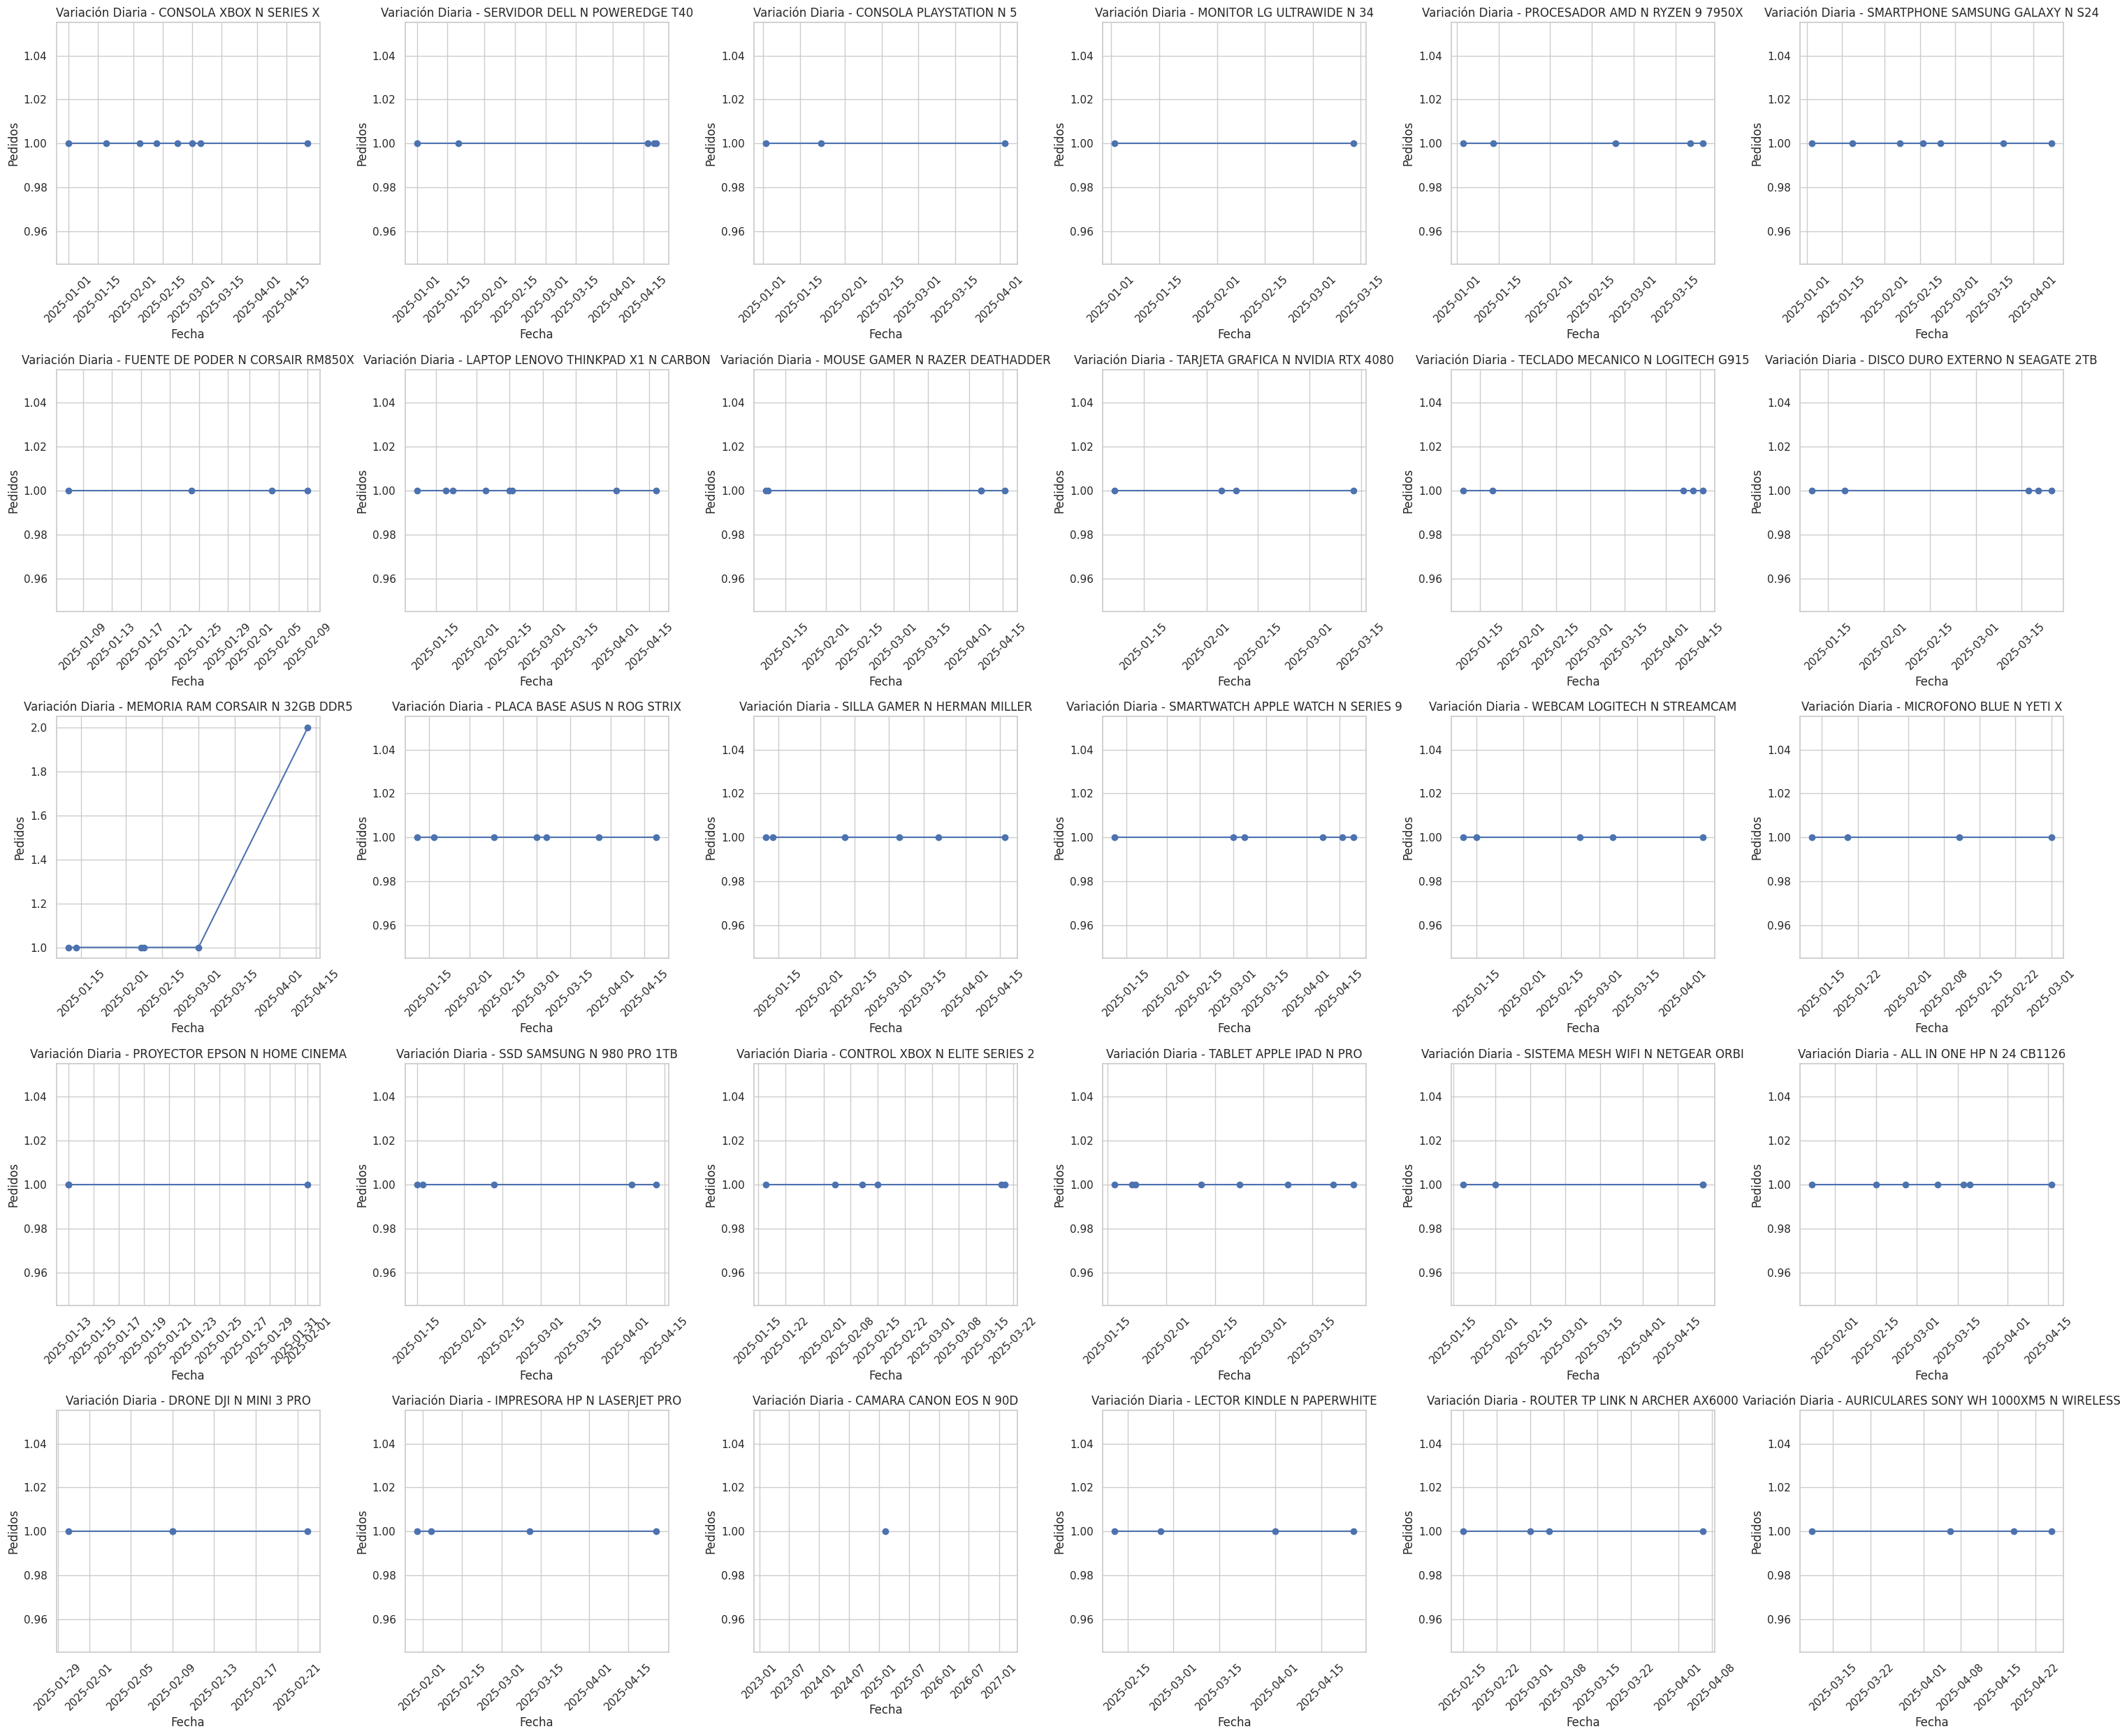

In [130]:
# Creacion de columna fecha
df_dia_prod = variacion_diaria.rename(columns={'anio': 'year', 'mes': 'month', 'dia': 'day'})
df_dia_prod['fecha'] = pd.to_datetime(df_dia_prod[['year', 'month', 'day']])

productos = df_dia_prod['producto'].unique()
ncols = 6
nrows = (len(productos) // ncols) + (len(productos) % ncols != 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(30, 5 * nrows))
axes = axes.flatten()

for i, producto in enumerate(productos):
    subset = df_dia_prod[df_dia_prod['producto'] == producto]
    axes[i].plot(subset['fecha'], subset['total_pedidos'], marker='o')
    axes[i].set_title(f'Variación Diaria - {producto}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Pedidos')
    axes[i].tick_params(axis='x', rotation=45)

# Quitar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



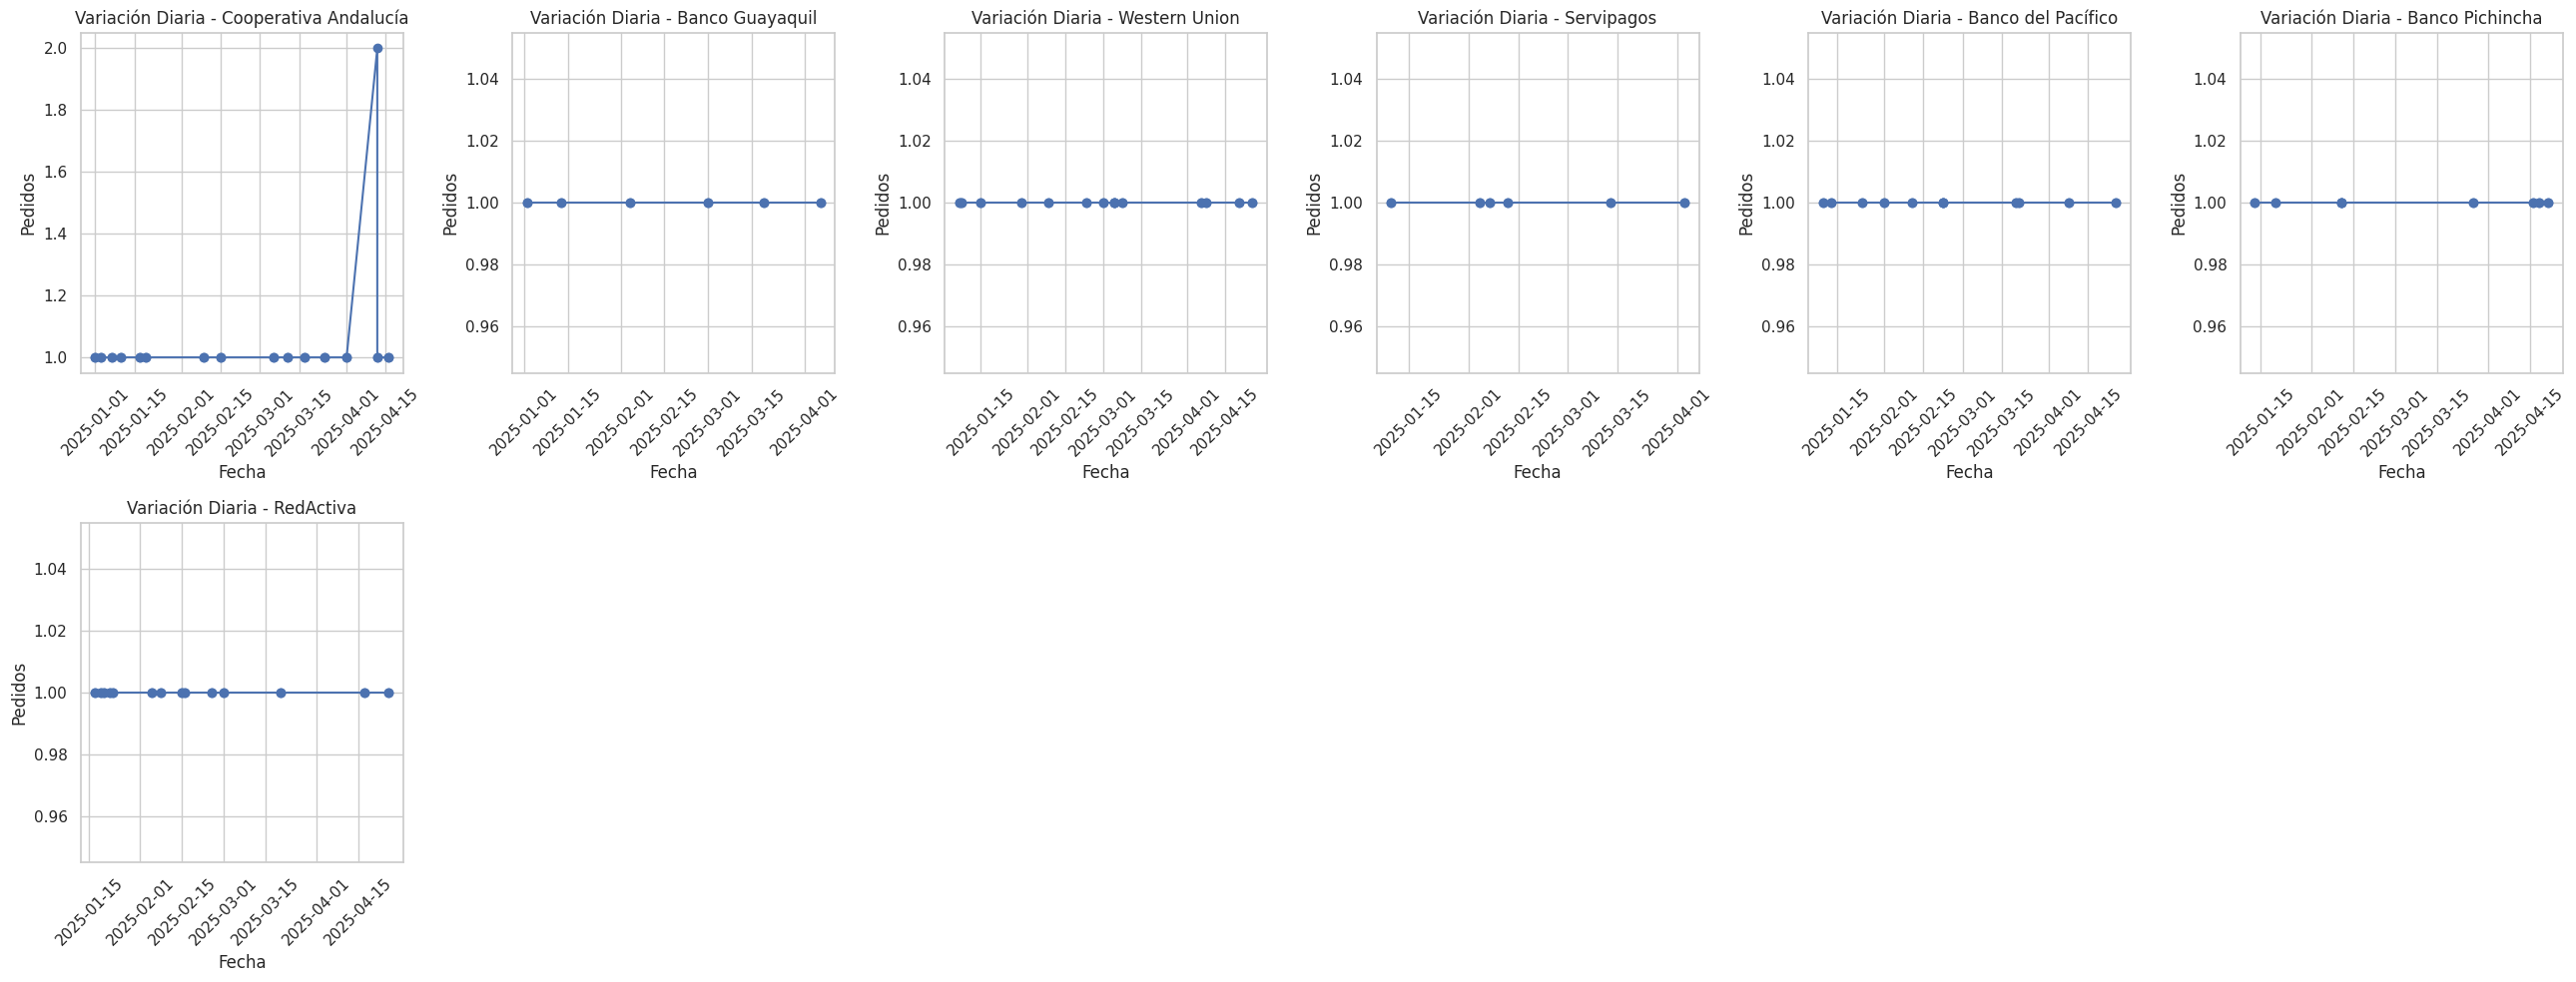

In [205]:
#Variación diaria de pedidos por corresponsal
corresponsales = df_dia_prod['corresponsal'].unique()
ncols = 6
nrows = (len(corresponsales) // ncols) + (len(corresponsales) % ncols != 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(26, 5 * nrows))
axes = axes.flatten()

for i, corr in enumerate(corresponsales):
    subset = df_dia_prod[df_dia_prod['corresponsal'] == corr]
    axes[i].plot(subset['fecha'], subset['total_pedidos'], marker='o')
    axes[i].set_title(f'Variación Diaria - {corr}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Pedidos')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [161]:
#Variación mensual de pedidos por producto
variacion_mensual

anio  mes                          producto           corresponsal  \
0    2025    1         ALL IN ONE HP N 24 CB1126     Banco del Pacífico   
1    2025    1           CONSOLA PLAYSTATION N 5        Banco Guayaquil   
2    2025    1           CONSOLA PLAYSTATION N 5              RedActiva   
3    2025    1           CONSOLA XBOX N SERIES X  Cooperativa Andalucía   
4    2025    1           CONSOLA XBOX N SERIES X              RedActiva   
..    ...  ...                               ...                    ...   
135  2025    4         SSD SAMSUNG N 980 PRO 1TB             Servipagos   
136  2025    4  TECLADO MECANICO N LOGITECH G915        Banco Pichincha   
137  2025    4  TECLADO MECANICO N LOGITECH G915     Banco del Pacífico   
138  2025    4  TECLADO MECANICO N LOGITECH G915  Cooperativa Andalucía   
139  2025    4       WEBCAM LOGITECH N STREAMCAM          Western Union   

     total_pedidos  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
135              1  
136              1  
137              1  
138              1  
139              1  

[140 rows x 5 columns]

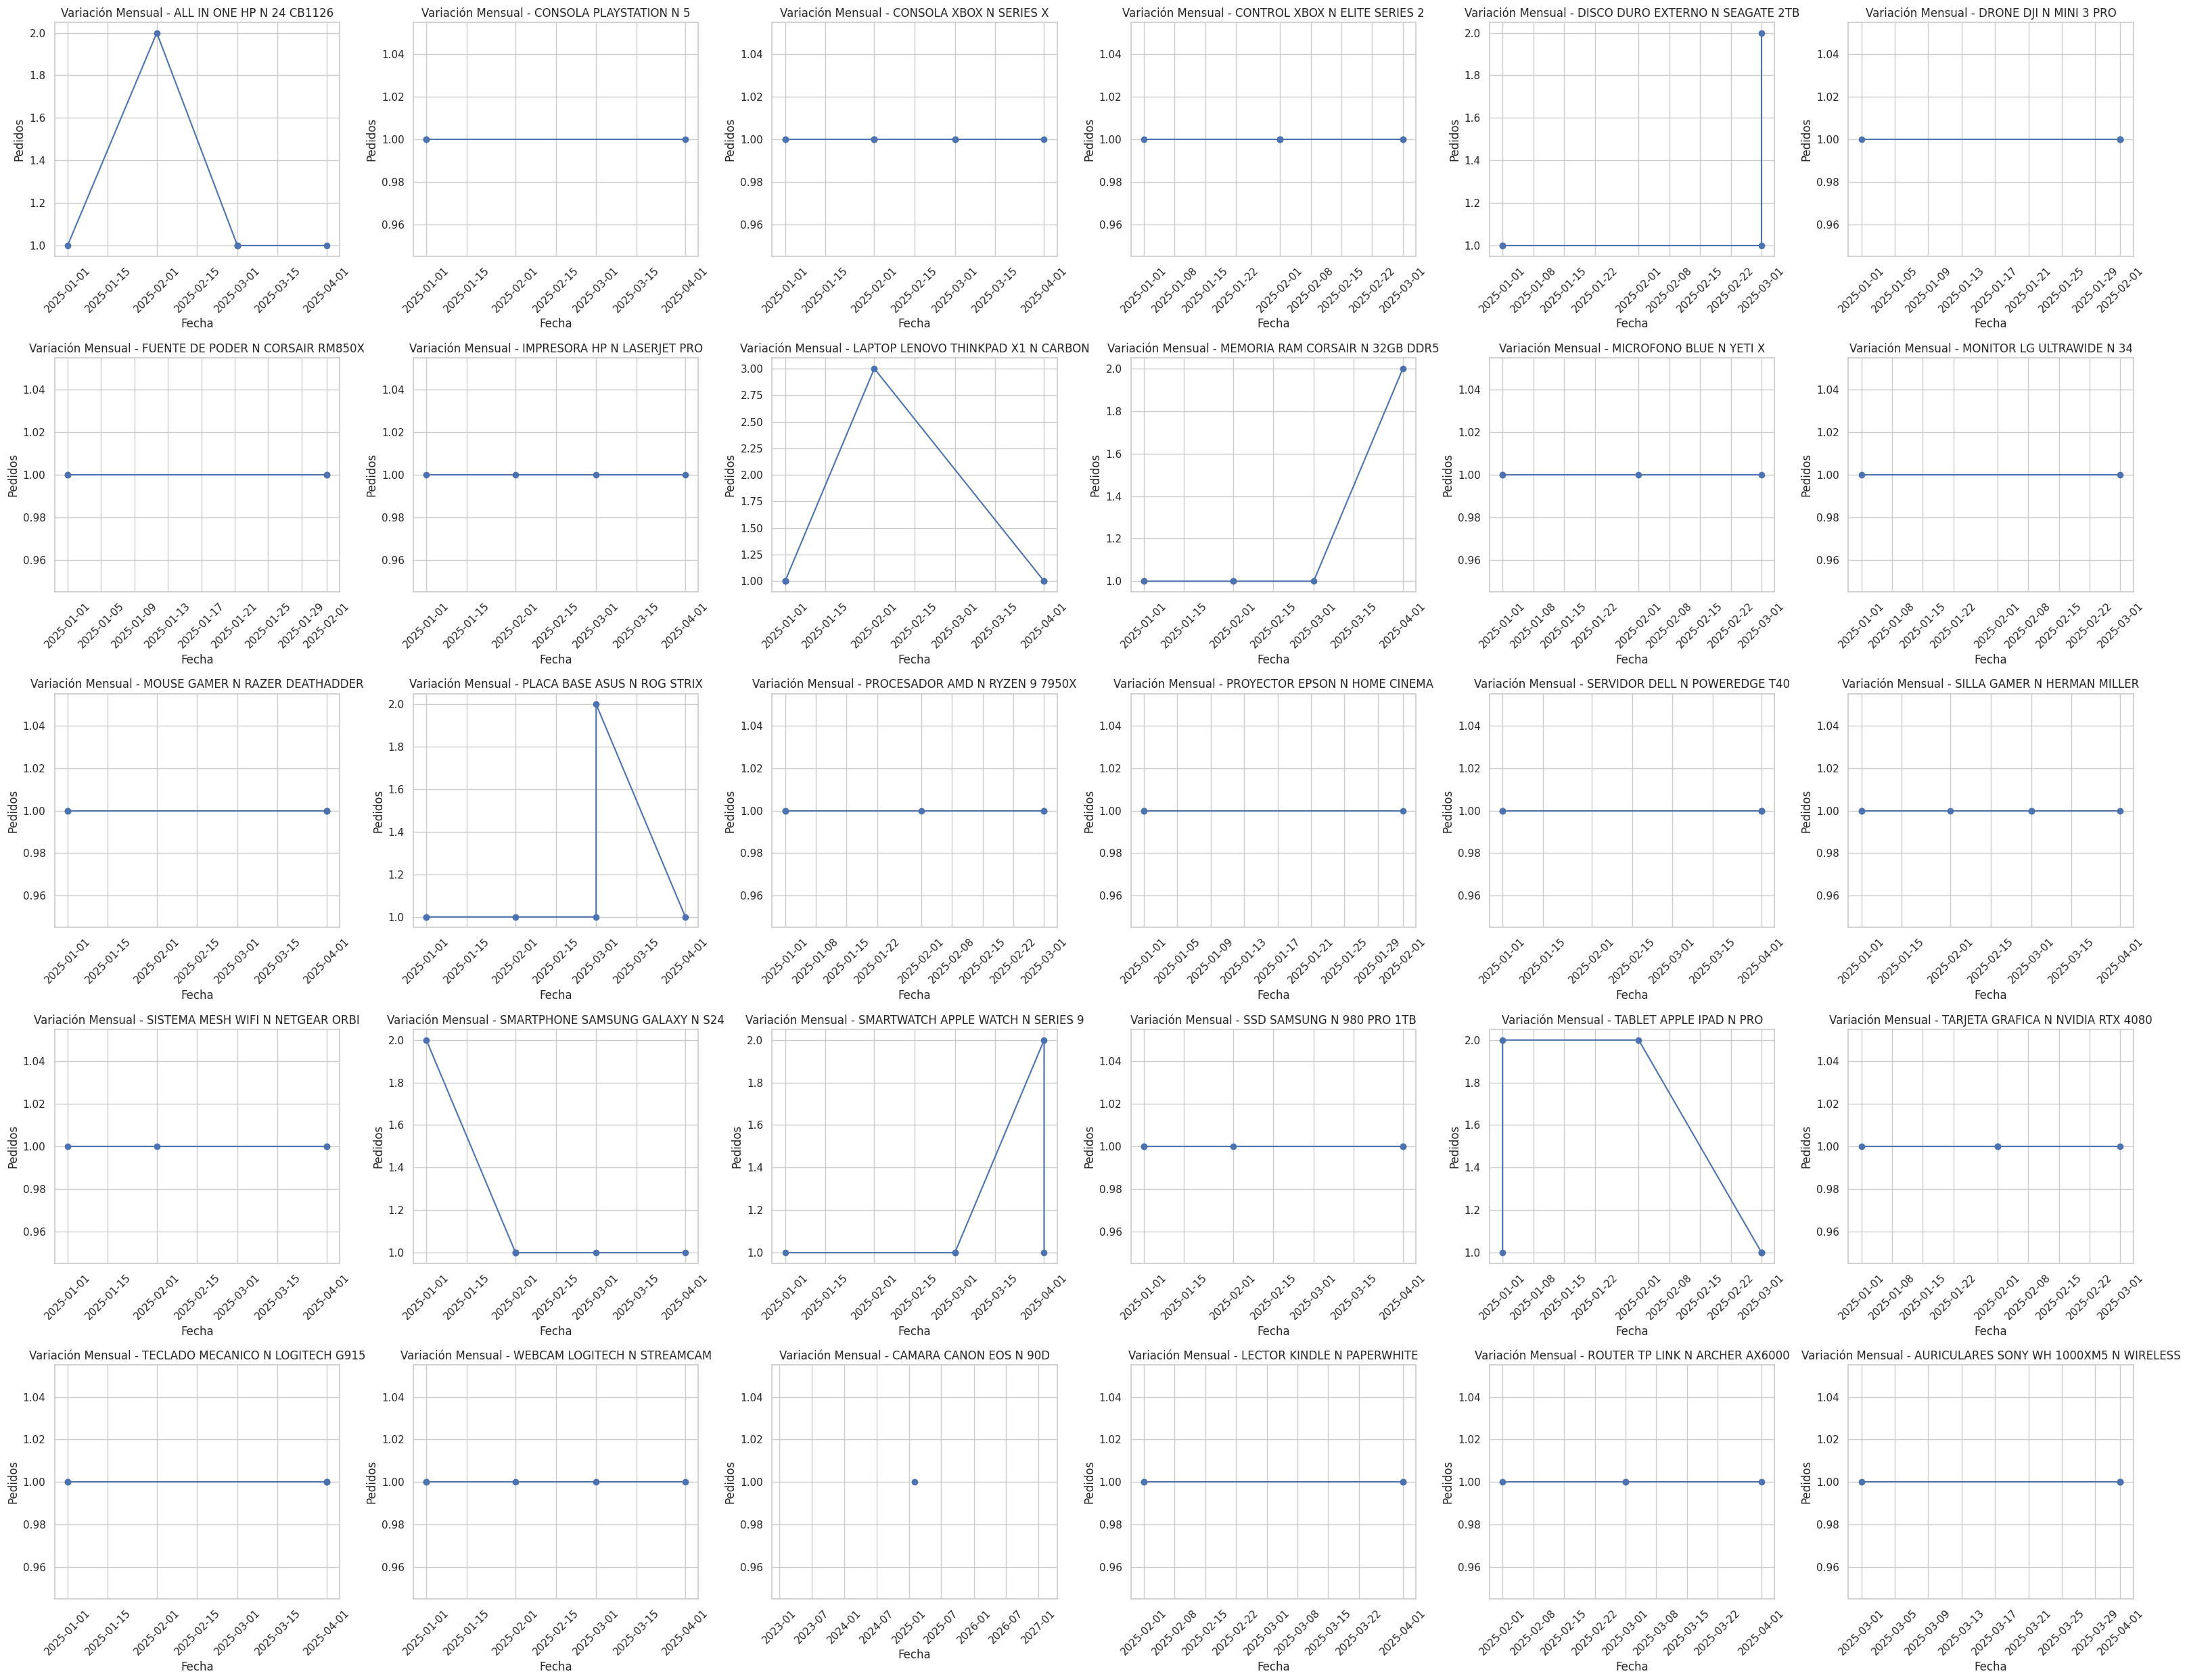

In [160]:
df_mes_prod = variacion_mensual.rename(columns={'anio': 'year', 'mes': 'month'})
df_mes_prod['fecha'] = pd.to_datetime(df_mes_prod[['year', 'month']].assign(day=1))

productos = df_mes_prod['producto'].unique()
ncols = 6
nrows = (len(productos) // ncols) + (len(productos) % ncols != 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(32, 5 * nrows))
axes = axes.flatten()

for i, producto in enumerate(productos):
    subset = df_mes_prod[df_mes_prod['producto'] == producto]
    axes[i].plot(subset['fecha'], subset['total_pedidos'], marker='o')
    axes[i].set_title(f'Variación Mensual - {producto}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Pedidos')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

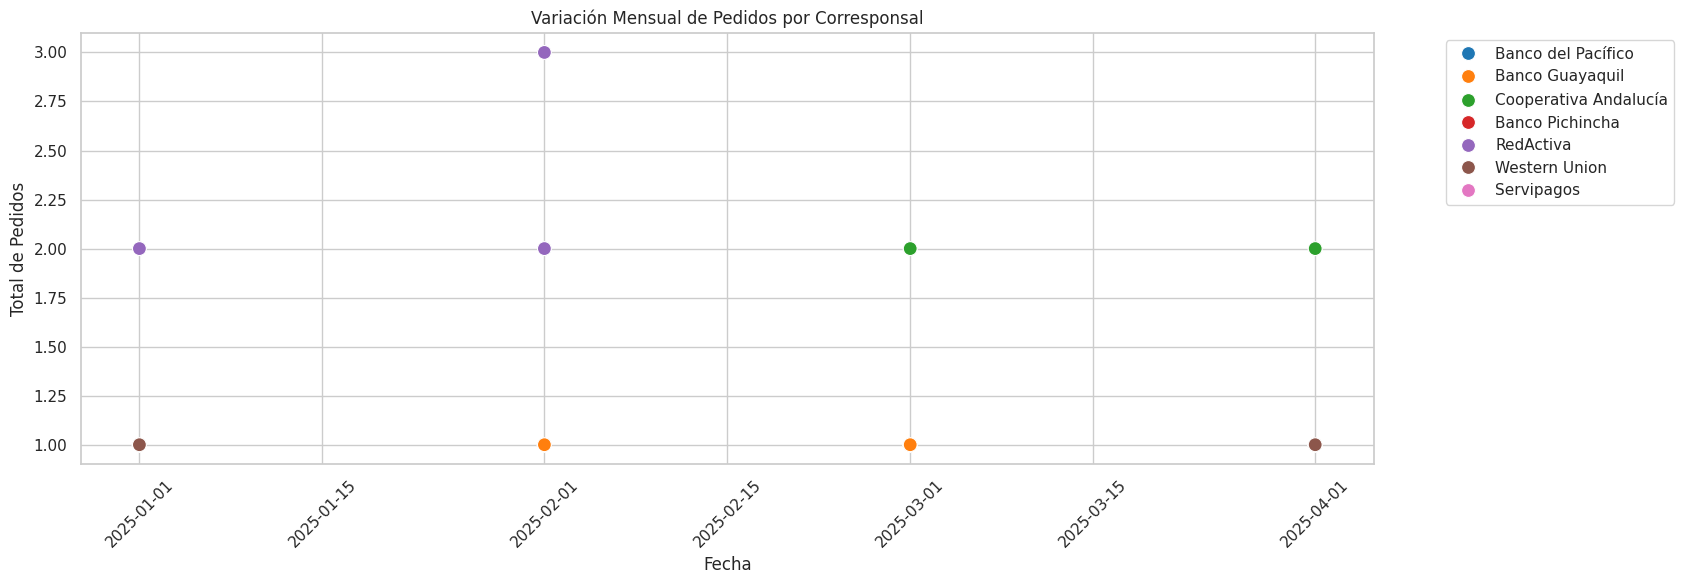

In [197]:
plt.figure(figsize=(14, 6))

# Gráfica de dispersión
sns.scatterplot(
    data=df_mes_prod,
    x='fecha',
    y='total_pedidos',
    hue='corresponsal',
    palette='tab10',
    s=100  # tamaño del punto
)

plt.title('Variación Mensual de Pedidos por Corresponsal')
plt.xlabel('Fecha')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # mover leyenda fuera
plt.show()
